<h1 style="text-align: center;"> Striver Binary Search - Binary Search on Answers </h1>

# 1. Find Square Root of a Number in log N :

## Problem Statement :

Given a positive integer n. Find and return its square root. If n is not a perfect square, then return the floor value of sqrt(n).


### Examples :

**Example 1:**
```
Input: n = 36
Output: 6

Explanation: 6 is the square root of 36.
```

**Example 2:**
```
Input: n = 28
Output: 5

Explanation: The square root of 28 is approximately 5.292. So, the floor value will be 5.
```

```
Constraints:
0 <= n <= 2^31 - 1
```

# Linear Search

### Intuition

The idea here is to search for the floor of the square root of the given number linearly. For each number from 1 to the given number, find its square and check if it is smaller than the given number. If it is, store the current integer as potential root, else break out of the loop as the further calculations will only provide larger square roots.

### Approach

* Start with ans initialized to 0, which will eventually hold the floor of the square root of n.
* Iterate using a for loop, ranging from 1 to n. For each integer compute 'val' as the square of the current integer.
* Check if 'val' is less than or equal to n. If true update 'ans' to the current value of the integer, because the current integer is a candidate for the square root.
* If val exceeds n, break out of the loop since further values of the next integer will only yield larger squares.
* Once the loop completes, ans contains the largest integer such that ans * ans is less than or equal to n, providing the floor of the square root of n. Finally return ans.

## Linear Search Python Solution

In [16]:
class Solution:
    """ Function to compute the floor of square root
       of a given integer """
    def floorSqrt(self, n: int) -> int:
        ans = 0
        
        # Linear search in the answer space
        for i in range(1, n + 1):
            val = i * i
            # Check if val is less than or equal to n
            if val <= n:
                ans = i  # Update ans to current value of i
            else:
                break  # Exit loop if val exceeds n
        
        # Return the computed floor of square root
        return ans

In [17]:
def main():
    n = 28
    
    # Create an object of the Solution class
    sol = Solution()
    
    ans = sol.floorSqrt(n)
    
    # Print the result
    print(f"The floor of square root of {n} is: {ans}")


if __name__ == "__main__":
    main()

The floor of square root of 28 is: 5


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^1/2$), where N is the given number. This is the case because we are using Linear Search, and the loop iterates up to sqrt(N) before breaking out.

**Space Complexity:**

The Space Complexity will be O(1) as no additional space is used.

# Binary Search

### Intuition

Binary Search algorithm can be used to optimize the Brute Force solution of Linear Search. While applying the Binary Search algorithm, compare the square of mid with the given number, if the square is less than or equal to the given number, store the mid as it can be a potential root and eliminate the left half of the search space, and eliminate the right half otherwise.

### Approach

* Start with initializing low to 1 and high initialized to n, where n is the given number, defining the search range for ans. Also, initialize ans to 0 to store the answer.
* Use a while loop, where it continues to search until low exceeds high. Calculate 'mid' as the midpoint between low and high. Compute val as mid * mid, the square of the midpoint.
* Check if 'val' is less than or equal to n. if true, it means mid could be a potential candidate for the square root. Store the mid in 'ans' and move the search to the right part by updating low to mid + 1. If false, move the search to the left part by updating high to mid - 1 because mid is too high and mid * mid exceeds n
* Once the while loop exits, 'ans' holds the largest integer ans such that ans * ans does not exceed n.

## Dry Run

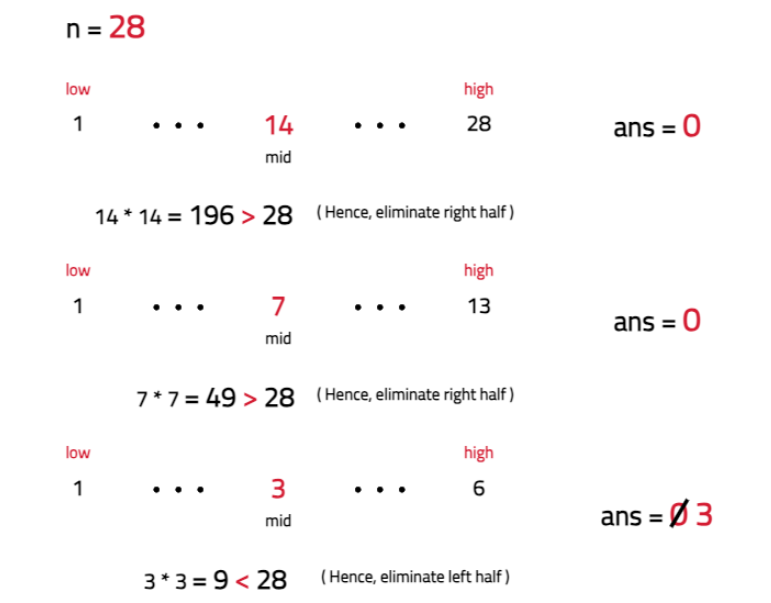
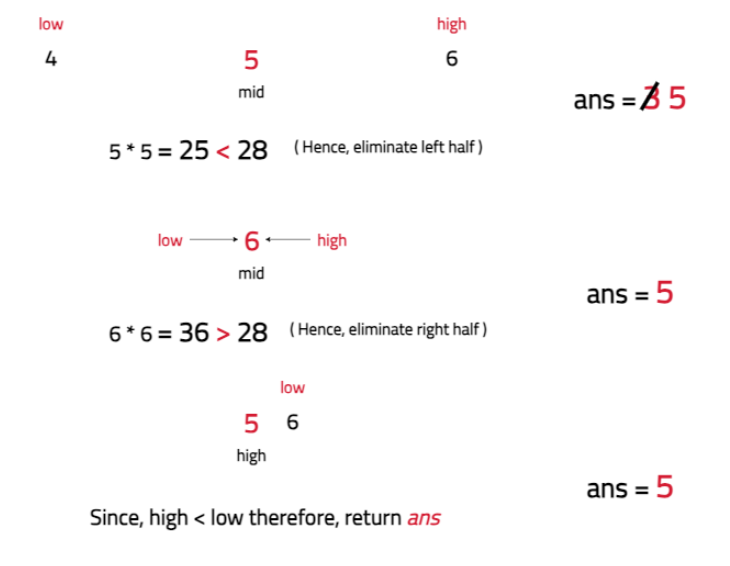

## Binary Search Python Solution

In [18]:
class Solution:
    """ Function to compute the floor of
       square root of a given integer """
    def floorSqrt(self, n: int) -> int:
        low, high = 1, n
        
        # Binary search on the answer space
        while low <= high:
            mid = low + (high - low) // 2
            val = mid * mid  # Python ints are unbounded
            
            # Check if val is less than or equal to n
            if val <= n:
                # Move to the right part
                low = mid + 1
            else:
                # Move to the left part
                high = mid - 1
        
        # Return the floor of square root
        return high

In [19]:
def main():
    n = 28
    
    # Create an object of the Solution class
    sol = Solution()
    
    ans = sol.floorSqrt(n)
    
    # Print the result
    print(f"The floor of square root of {n} is: {ans}")


if __name__ == "__main__":
    main()

The floor of square root of 28 is: 5


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(logN), where N is the given number. We are basically using the Binary Search algorithm.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used in this case.
```

## FAQs & Interview Follow-ups :

**How do we avoid integer overflow when computing mid^2?**
```
Instead of directly calculating mid^2, compare mid with n/mid. If mid > n / mid, mid^2 exceeds n, and you should move left. This ensures safe arithmetic even for large n.
```

**What happens if n is a perfect square?**
```
The binary search naturally finds the exact square root when mid^2 == n. The result is returned directly without additional steps.
```

**What if the function needs to work in real-time systems?**
```
Use approximation techniques like Newton’s method, which converges quickly and is well-suited for systems requiring rapid results.
```

**How would you compute the square root for floating-point numbers?**
```
For floating-point numbers, extend the Binary Search to calculate the square root up to a desired precision (ϵ): Continue the search until ∣mid^2−n∣<ϵ. Update low and high with smaller increments as the range narrows.
```

# 2. Find the Nth Root of a Number using Binary Search :

## Problem Statement :

Given two numbers N and M, find the Nth root of M. The Nth root of a number M is defined as a number X such that when X is raised to the power of N, it equals M. If the Nth root is not an integer, return -1.


### Examples :

**Example 1:**
```
Input: N = 3, M = 27
Output: 3

Explanation: The cube root of 27 is equal to 3.
```

**Example 2:**
```
Input: N = 4, M = 69
Output:-1

Explanation: The 4th root of 69 does not exist. So, the answer is -1.
```

```
Constraints:
1 <= N <= 30
1 <= M <= 10^9
```

# Linear Search

### Intuition

Perform a simple Linear Search in range [1,M]. Calculate the value of x raised to the power N for every number x in this range. If it is equal to the given number then, x is the Nth root of the number. If no such number (x) exists, return -1 as an answer.

### Approach and the Working of nthRoot(N, M):

* Iterate from 1 to M(given number) using a for loop. Calculate the value of x raised to the power n as follows:

```
Start with the result as 1 and keep track of the base value.
If the exponent is odd, multiply the result by the base and reduce the exponent by one.
If the exponent is even, square the base and half the exponent.
Continue the process until the exponent becomes zero, and the final result is returned.
```

* If the result is equal to M, this means x is the Nth root of M. So, return x from this step.
* If the calculated value is smaller than M, then continue to next iteration.
* If the calculated value is greater than M, this means we have got a bigger number than our answer and until now we have not found any number that can be our answer. In this case, our answer does not exist and break out from this step and return -1.

## Linear Search Python Solution

In [20]:
class Solution:
    """ Function to calculate power using
    exponentiation by squaring method"""
    def Pow(self, b, exp):
        ans = 1
        base = b
        
        # Exponentiation by squaring method
        while exp > 0:
            if exp % 2 == 1:
                exp -= 1
                ans *= base
            else:
                exp //= 2
                base *= base
        return ans

    """ Function to find the nth root
        of m using linear search"""
    def NthRoot(self, N: int, M: int) -> int:
        # Linear search on the answer space
        for i in range(1, M + 1):
            val = self.Pow(i, N)

            """ Check if the computed
            value is equal to M"""
            if val == M:
                # Return the root value
                return i
            elif val > M:
                break
        # Return -1 if no root found
        return -1

In [21]:
# Driver code
if __name__ == "__main__":
    n, m = 3, 27
    
    # Create an object of the Solution class
    sol = Solution()
    
    ans = sol.NthRoot(n, m)
    
    # Print the result
    print(f"The answer is: {ans}")

The answer is: 3


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N*logN). This is because the for loop runs takes O(M) time and calculating Pow(x, N) takes O(logN) time. However, since the for loop breaks as soon as the result of Pow(x, N) becomes greater than M, thus, the for loops actually runs only for N iterations making overall complexity as O(N*logN).
```

**Space Complexity:**
```
The Space Complexity will be O(1), as there are only a couple of variables used.
```

# Binary Search

### Intuition

The idea here is to use Binary Search to optimize the solution. Although the traditional application of Binary Search involves a sorted array, upon closer observation, one can notice that the search space for the answer here ranges from 1 to M, which inherently forms a sorted sequence. So, binary search can be applied.

## Approach

<b>Need of a helper function to find the exponent of the number:</b> If the given numbers M and N are big enough, the value of mid^N can not be stored in a variable. So to resolve this problem, implement a helper function.

### Working of nthRoot(N, M):

* Place the 2 pointers, low and high: Initially, place the low pointer at 1 and the high will point to M.
* Inside the while loop, which runs till low is less than or equal to high, calculate the value of ‘mid’.

* Eliminate the halves accordingly:

```
If helper function returns 1: We can conclude that the number ‘mid’ is our answer. So, return ‘mid’.
If helper function returns 0: It can be concluded that the number ‘mid’ is smaller than our answer. So, eliminate the left half and consider the right half (i.e. low = mid+1).
If helper function returns 2: The value mid is larger than the number we want. This means the numbers greater than ‘mid’ will not be our answers and the right half of ‘mid’ consists of such numbers. So, eliminate the right half and consider the left half (i.e. high = mid-1).
```

* Finally, no answer is found from the loop, this means no answer exists. So, we will return -1.

### Working of func(mid, n, m):

* First declare a variable ‘ans’ to store the value mid^n. Now, use Exponentiation by Squaring method to find the result.
* Inside the while loop, if at any point ‘ans’ becomes greater than M, return 2.
* Once the loop is completed, if the ‘ans’ is equal to M, return 1.
* If the value is smaller, return 0.

## Dry Run

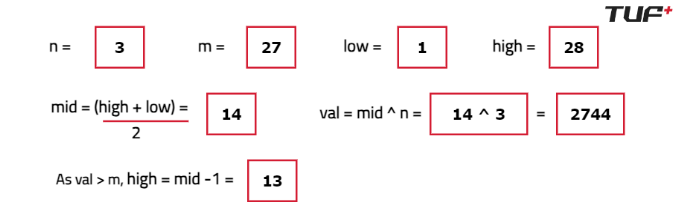
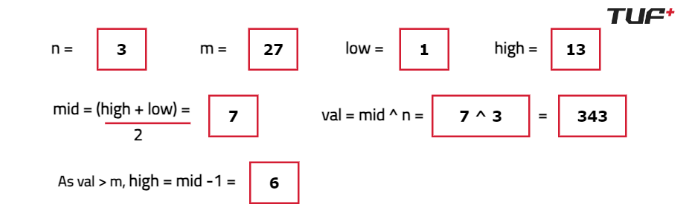
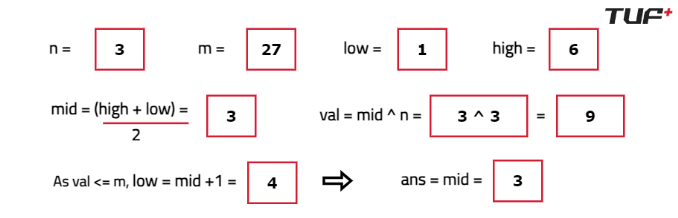
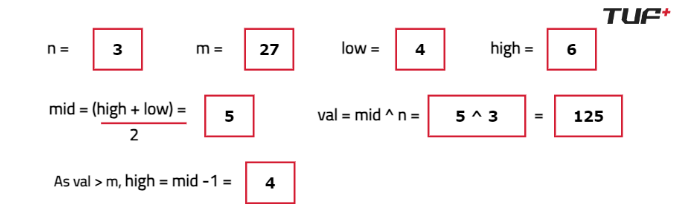
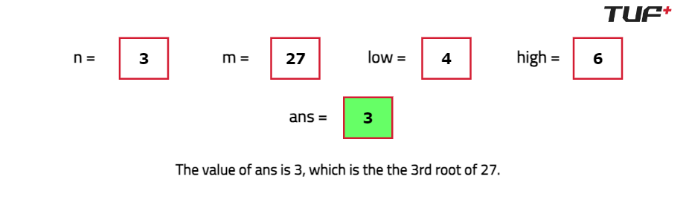

## Binary Search Python Solution

In [22]:
class Solution:
    # Helper function to check mid^N compared to M
    def helperFunc(self, mid, n, m):
        ans, base = 1, mid

        while n > 0:
            if n % 2 == 1:
                ans *= base
                if ans > m:
                    return 2  # Early exit
                n -= 1
            else:
                n //= 2
                base *= base
                if base > m:
                    return 2
        
        if ans == m:
            return 1
        return 0

    # Function to find the Nth root of M using Binary Search
    def NthRoot(self, N, M):
        low, high = 1, M
        
        while low <= high:
            mid = (low + high) // 2
            midN = self.helperFunc(mid, N, M)
            
            if midN == 1:
                return mid  # Found exact root
            elif midN == 0:
                low = mid + 1  # Move right
            else:
                high = mid - 1  # Move left
        
        return -1  # No integer root found

In [23]:
# Test case
n, m = 3, 27
sol = Solution()
ans = sol.NthRoot(n, m)
print("The answer is:", ans)

The answer is: 3


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(logM * logN).
This is because tTheBbinarySsearch on the search space (of size M) takes O(logM) and the helper function takes O(logN) taking overall O(logM * logN).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as there are only a couple of variables used..
```

## FAQs & Interview Follow-ups :

**What happens if M is not a perfect N-th power?**
```
Binary search will terminate without finding mid^N=M. Return −1 in such cases, as the N-th root is not an integer.
```

**How do we avoid integer overflow when calculating mid^N?**
```
Instead of directly calculating mid^N, compute mid^N iteratively: Multiply mid^N times while checking if the result exceeds M. Stop early if overflow is detected.
```

**What if M and N are very large?**
```
For large M, calculate mid^N iteratively to prevent overflow. For large N, reduce the problem to smaller powers using modular arithmetic or logarithms (log(M)/N) to estimate the root.
```

**How would you extend this to multi-dimensional data?**
```
For matrices or tensors, compute the root element-wise using the same binary search logic. If the root must satisfy additional conditions (e.g., orthogonality), integrate those into the solution.
```

# 3. Koko Eating Bananas :

## Problem Statement :

A monkey is given n piles of bananas, where the 'ith' pile has nums[i] bananas. An integer h represents the total time in hours to eat all the bananas.

Each hour, the monkey chooses a non-empty pile of bananas and eats k bananas. If the pile contains fewer than k bananas, the monkey eats all the bananas in that pile and does not consume any more bananas in that hour.

Determine the minimum number of bananas the monkey must eat per hour to finish all the bananas within h hours.


### Examples :

**Example 1:**
```
Input: n = 4, nums = [7, 15, 6, 3], h = 8
Output: 5

Explanation: If Koko eats 5 bananas/hr, he will take 2, 3, 2, and 1 hour to eat the piles accordingly. So, he will take 8 hours to complete all the piles.  
```

**Example 2:**
```
Input: n = 5, nums = [25, 12, 8, 14, 19], h = 5
Output: 25

Explanation: If Koko eats 25 bananas/hr, he will take 1, 1, 1, 1, and 1 hour to eat the piles accordingly. So, he will take 5 hours to complete all the piles.
```

**Example 3:**
```
Input: n = 4, nums = [3, 7, 6, 11], h = 8
Output: 4

```
```
Constraints:
1 <= n <= 10^4
n <= h <= 10^9
1 <= nums[i] <= 10^9
```

# Linear Search

## Intuition

The straightforward solution for this problem is to use Linear Search algorithm to check all possible answers from 1 to max, where max is the maximum element of the array. The minimum number for which the required time is less than or equal to h, is our required answer.

## Approach

### Working of minimumRateToEatBananas(nums, h):

* First find out the maximum element in array by calling the 'findMax()'.
* Then , iterate from 1 to max which signifies the number of bananas eaten per hour, and for each iteration find out the hour taken to eat those bananas by calling calculateTotalHours ().
* If the calculated hour is less than or equal to given limit, return the current value of iteration (number of bananas) as an answer.
* If no suitable answer is found, return max element as an answer.

### Working of findMax(arr):

* First initialize a variable 'maxi', which will store maximum element of the array.
* Now, literate through the array and find the maximum element among them, and return it.

### Working of calculateTotalHours(arr,hourly):

* Start with initializing n = size of array, which gives the number of elements in the array. Initialize 'totalH' to 0, which will accumulate the total hours required. 'hourly' represents the number of items that can be processed per hour.
* Compute the number of hours required to eat all bananas at the rate of 'hourly' bananas per hour and store in 'totalH'. Use ceil function to round up the division result to ensure that partial hours are counted correctly when necessary. Ater the traversal has ended, return 'totalH' as answer.nswer.nswer.

## Linear Search Python Solution

In [24]:
import math

class Solution:
    # Helper function to find the maximum element in the list 
    def findMax(self, v):
        maxi = float('-inf')
        n = len(v)
        
        # Find the maximum element
        for i in range(n):
            maxi = max(maxi, v[i])
        return maxi

    """ Helper function to calculate total hours
        required at given hourly rate """
    def calculateTotalHours(self, v, hourly):
        totalH = 0
        n = len(v)
        
        # Calculate total hours required
        for i in range(n):
            totalH += math.ceil(v[i] / hourly)
        return totalH

    # Function to find the minimum rate to eat bananas 
    def minimumRateToEatBananas(self, nums, h):
        # Find the maximum number of bananas
        maxi = self.findMax(nums)

        """ Find the minimum value of k
            that satisfies the condition """
        for i in range(1, maxi + 1):
            reqTime = self.calculateTotalHours(nums, i)
            if reqTime <= h:
                return i

        """ Dummy return statement (should 
            not be reached in valid cases) """
        return maxi

In [25]:
# Driver Code
if __name__ == "__main__":
    v = [7, 15, 6, 3]
    h = 8

    # Create an object of the Solution class
    sol = Solution()

    ans = sol.minimumRateToEatBananas(v, h)

    # Print the result
    print(f"Koko should eat at least {ans} bananas/hr.")

Koko should eat at least 5 bananas/hr.


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(max * N), where max is the maximum element in the array and N is the size of the array. We are running nested loops. The outer loop runs for max times in the worst case and the inner loop runs for N times.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# Binary Search

## Intuition

The idea here is to use Binary Search algorithm to solve this problem in an optimized way. Now, the search space will be in the range[1,max], where max is the maximum element in the array because the maximum bananas that the monkey can eat per hour can be the maximum element of the array. Since the search space is sorted, so binary search can be applied for better time complexity.

## Approach

### Working of minimumRateToEatBananas(nums, h):

* The function starts by initializing low to 1 (minimum possible eating rate) and high to maximum element of the array using findMax function, which finds the maximum element in the given array. This sets up the binary search bounds where the eating rate will be searched.
* Initialize a while loop that continues as long as low is less than or equal to high. Compute mid as the midpoint between low and high.
* Use the function calculateTotalHours to estimate how many hours would be needed to eat all bananas in the array at the rate `mid` bananas per hour.
* Compare total hour (total hours calculated at rate mid) with h (desired total hours). If total hour is less than or equal to h, it means the current eating rate mid is sufficient or possibly too high, so adjust high to mid - 1 to search for potentially smaller rates. Else, adjust low to mid + 1 to search for higher rates that might still satisfy the condition.
* Once the binary search completes (low > high), low represents the minimum eating rate such that eating all bananas within h hours is feasible.

### Working of findMax(arr):

* First initialize a variable 'maxi', which will store maximum element of the array.
* Now, literate through the array and find the maximum element among them, and return it.

### Working of calculateTotalHours(arr,hourly):

* Start with initializing n = size of array, which gives the number of elements in the array. Initialize 'totalH' to 0, which will accumulate the total hours required. 'hourly' represents the number of items that can be processed per hour.
* Compute the number of hours required to eat all bananas at the rate of 'hourly' bananas per hour and store in 'totalH'. Use ceil function to round up the division result to ensure that partial hours are counted correctly when necessary. Ater the traversal has ended, return 'totalH' as answer.

## Dry Run

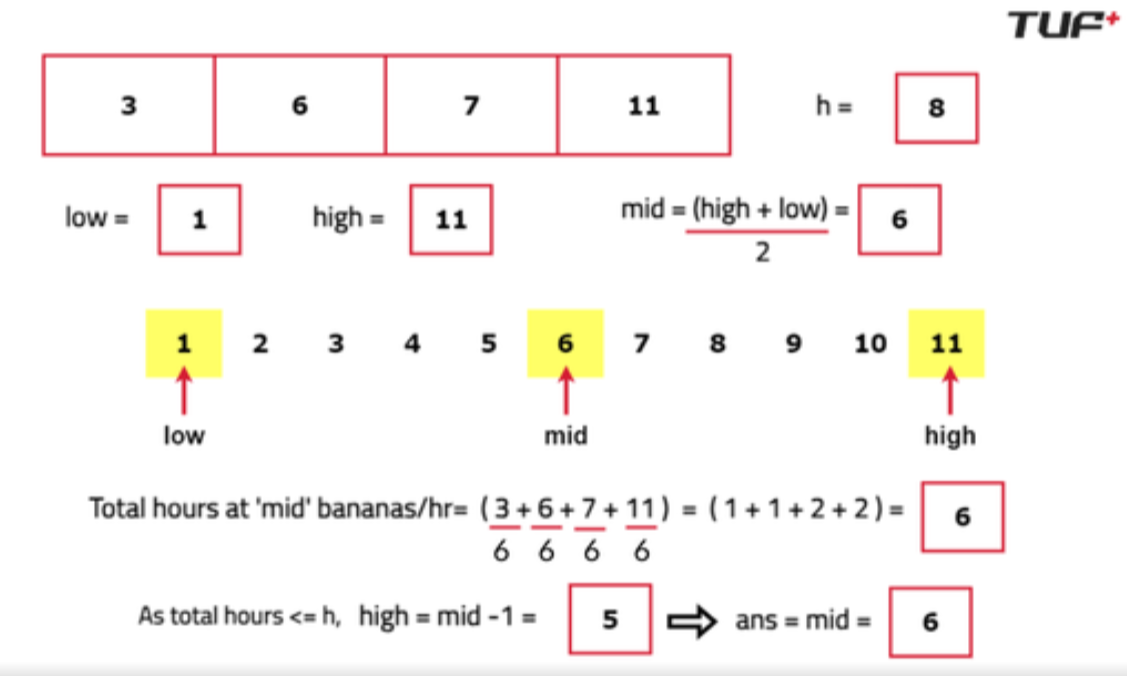
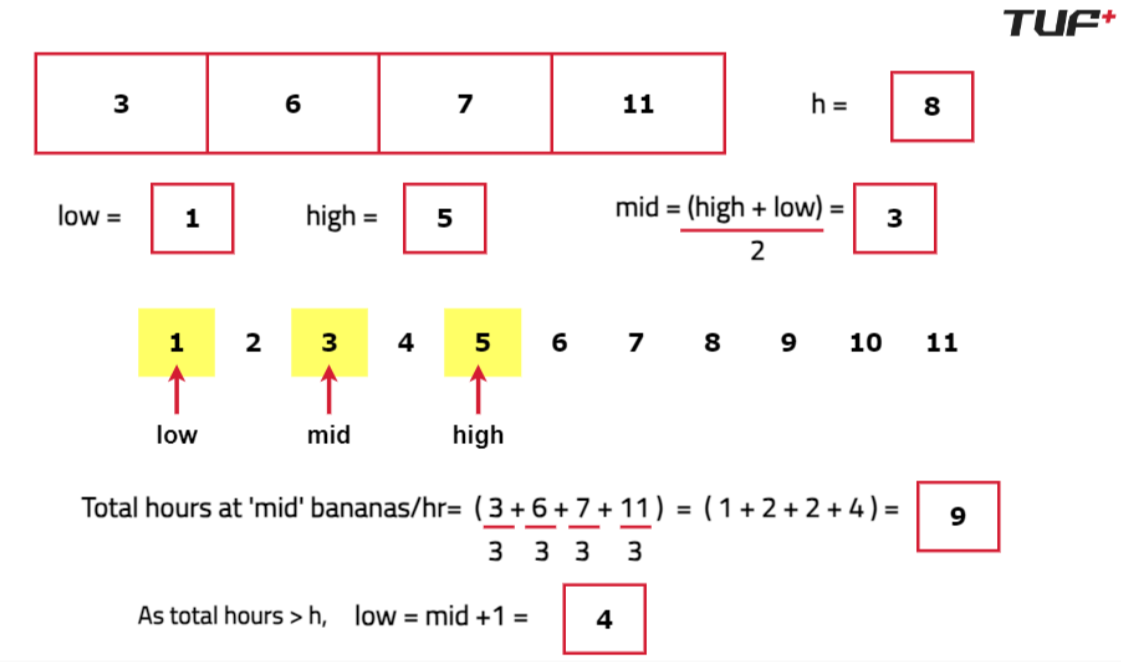
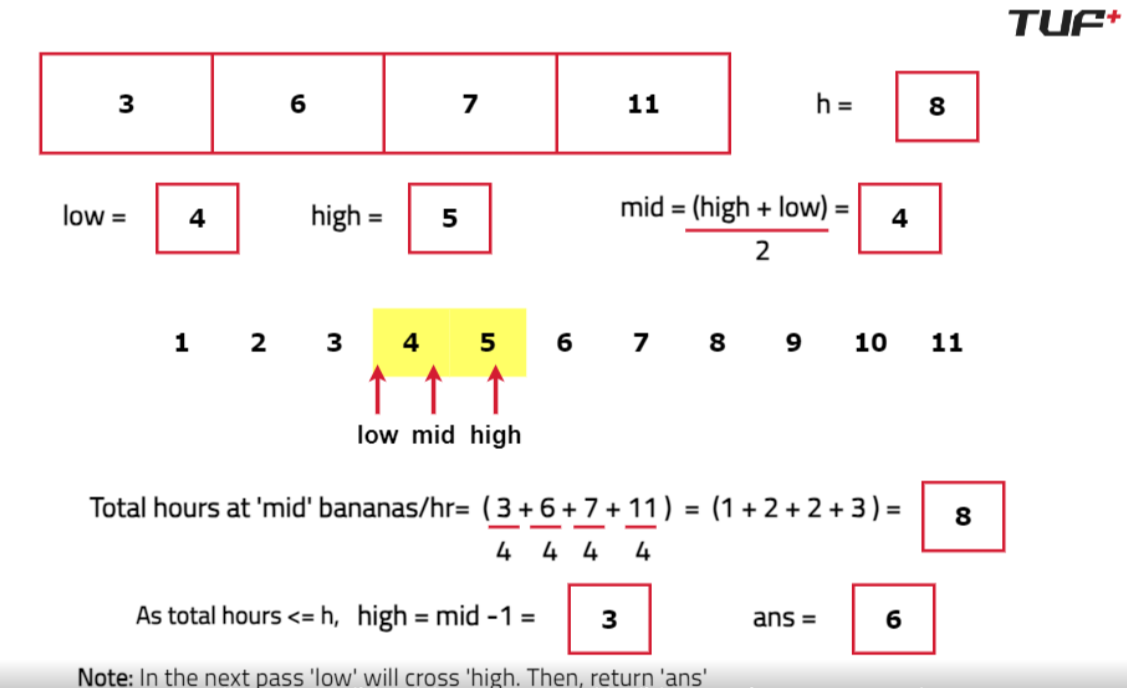

## Binary Search Python Solution

In [26]:
import math

class Solution:
    """ Helper function to find the
    maximum element in the array"""
    def findMax(self, nums):
        maxi = float('-inf')
        n = len(nums)

        # Find the maximum element
        for i in range(n):
            maxi = max(maxi, nums[i])
        return maxi

    """ Function to calculate total hours
    required at given hourly rate"""
    def calculateTotalHours(self, nums, hourly):
        totalH = 0
        n = len(nums)

        # Calculate total hours required
        for i in range(n):
            totalH += math.ceil(nums[i] / hourly)
        return totalH

    """ Function to find the 
    minimum rate to eat bananas"""
    def minimumRateToEatBananas(self, nums, h):
        # Initialize binary search bounds
        low, high = 1, self.findMax(nums)

        # Apply binary search
        while low <= high:
            mid = (low + high) // 2
            totalH = self.calculateTotalHours(nums, mid)
            if totalH <= h:
                high = mid - 1
            else:
                low = mid + 1
        return low

In [28]:
if __name__ == "__main__":
    nums = [3, 6, 7, 11]
    h = 8

    # Create an object of the Solution class
    sol = Solution()

    ans = sol.minimumRateToEatBananas(nums, h)

    # Print the result
    print(f"Koko should eat at least {ans} bananas/hr.")

Koko should eat at least 4 bananas/hr.


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N * log(max)), where max is the maximum element in the array and N is size of the array. We are applying Binary search for the range [1, max], and for every value of ‘mid’, we are traversing the entire array inside the function named calculateTotalHours().
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**What if the total hours required exceeds h?**
```
If the hours exceed h for a given k, k is too small, and the monkey needs to eat faster. Adjust the Binary Search range by setting low=mid+1.
```

**How do we handle very large values of nums[i] or h?**
```
Use (nums[i]+k−1)//k instead of floating-point division to avoid precision issues and maintain integer operations. This ensures accuracy even with large inputs.
```

**How would you extend this for varying hourly capacities?**
```
If the monkey’s eating rate changes per hour (e.g., k depends on the hour), use a dynamic approach to calculate the minimum k for each hour, adjusting the binary search to consider these variations.
```

**What if the piles of bananas can be replenished?**
```
For dynamic or replenishing piles, track the rate of replenishment and modify the binary search to account for the changing size of nums[i] at each hour.
```

# 4. Minimum Days to make M Bouquets :

## Problem Statement :

Given n roses and an array nums where nums[i] denotes that the 'ith' rose will bloom on the nums[i]th day, and only adjacent bloomed roses can be picked to make a bouquet. Exactly k adjacent bloomed roses are required to make a single bouquet. 

<b>Find the minimum number of days required to make at least m bouquets, each containing k roses. Return -1 if it is not possible.</b>


### Examples :

**Example 1:**
```
Input: n = 8, nums = [7, 7, 7, 7, 13, 11, 12, 7], m = 2, k = 3
Output: 12

Explanation: Each value in nums corresponds to the count of days. On the 12th day, the first 4 flowers and the last 3 flowers would have already bloomed. So, we can easily make 2 bouquets, one with the first 3 and another with the last 3 flowers.
```

**Example 2:**
```
Input: n = 5, nums = [1, 10, 3, 10, 2], m = 3, k = 2
Output: -1

Explanation: If we want to make 3 bouquets of 2 flowers each, we need at least 6 flowers. But we are given only 5 flowers, so, we cannot make the bouquets.
```

**Example 3:**
```
Input: n = 5, nums = [1, 10, 3, 10, 2], m = 3, k = 1
Output: 3

```
```
Constraints:
1 <= n <= 10^5
1 <= nums[i] <= 10^9
1 <= m <= 10^6
1 <= k <= n
```

# Linear Search

### Intuition

The very straightforward approach is to check all possible answers from range min to max linearly, where min is the minimum element of the array and max is the maximum element of the array. Each number in the range shows the number of days. The minimum number of days for which at least 'm' bouquet can be made each containing 'k' rose will be our final answer.

## Approach

<b>Edge case:</b> If the product k*m (minimum number of roses required) is greater than size of the array, then it is impossible to make bouquet, and in that case return -1.

### Working of roseGarden(n, nums, k, m):

* Calculate val as the product of 'm' (number of bouquets) and 'k' (number of roses each bouquet should have), ensuring it's cast to long to avoid overflow. Determine the size n of the array.
* Initialize mini and maxi to INT_MAX and INT_MIN, respectively, to find the first day when a flower blooms and the last on which all fowers should have already bloomed.
* Iterate through the days starting from mini to maxi. For each day, use the possible function to check if the total number of bouquets on this day, each containing k roses is greater than or equal to "m". If yes, return the current day as an answer.
* After coming out of the loop, return -1 as no day is found matching the constraints.

### Working of possible(nums, day, k):

* First, initialize 'n' to the size of nums, which represents the number of flowers. Initialize 'cnt' to 0 which keeps track of how many flowers have bloomed within the current threshold day. Initialize 'noOfB' of 0, which keeps track of the total number of bouquets formed.
* The function iterates through each flower's blooming day in nums. For each flower, if its blooming day is less than or equal to day, increment 'cnt' (indicating a flower that can be used to form a bouquet). If a flower's blooming day exceeds day, calculate how many complete bouquets (cnt / k) can be formed with the flowers that bloomed up to that point (cnt). Add this count to noOfB. Reset 'cnt' to zero because flowers blooming after day cannot be used for the current bouquet.
* After iterating through all flowers, there might be remaining flowers (cnt) that have bloomed within day. Calculate how many additional bouquets can be formed with these remaining flowers and add this to noOfB.
* Finally, check if the total number of bouquets (noOfB) formed is greater than or equal to m. If so, return true, indicating that it's possible to form at least m bouquets with the given constraints (day and k).If not, return false.

## Linear Search Python Solution

In [29]:
 class Solution:
    """Function to check if it's possible to make
    m bouquets with k flowers each on a given day"""
    def possible(self, nums, day, m, k):
        n = len(nums)
        
        # Count of flowers bloomed
        cnt = 0 
        
        # Count of bouquets formed
        noOfB = 0 

        # Count number of bouquets that can be formed
        for i in range(n):
            if nums[i] <= day:
                # Increment flower count
                cnt += 1 
            else:
                # Calculate number of bouquets formed with flowers <= day
                noOfB += (cnt // k)
                
                # Reset flower count
                cnt = 0 
        
        # Add remaining flowers as a bouquet
        noOfB += (cnt // k) 
        
        # Return true if enough bouquets can be formed
        return noOfB >= m 

    """Function to find the earliest day to
    make m bouquets of k flowers each"""
    def roseGarden(self, n, nums, k, m):
        # Calculate the minimum number of flowers required
        val = m * k 
        
        # Impossible case: not enough flowers to make m bouquets
        if val > n:
            return -1 
        
        # Find maximum and minimum bloom days in the array
        mini = float('inf')
        maxi = float('-inf')
        for num in nums:
            mini = min(mini, num) 
            maxi = max(maxi, num) 
        
        # Linear search to find the earliest day to make m bouquets
        for i in range(mini, maxi + 1):
            if self.possible(nums, i, m, k):
                return i

        # Return -1 if no such day exists
        return -1 

In [30]:
if __name__ == "__main__":
    arr = [7, 7, 7, 7, 13, 11, 12, 7] 
    
    n = len(arr)
    
    # Number of flowers per bouquet
    k = 3 
    
    # Number of bouquets needed
    m = 2 

    # Create an instance of the Solution class
    sol = Solution() 
    
    ans = sol.roseGarden(n, arr, k, m) 

    if ans == -1:
        print("We cannot make m bouquets.") 
    else:
        print(f"We can make bouquets on day {ans}") 

We can make bouquets on day 12


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O((max-min+1) * N), where max is the maximum element of the array, min is the minimum element of the array, and N is size of the array.

This is because we are running a loop to check answers that are in the range of [min, max]. For every possible answer, the possible() function is being called. Inside the possible() function, we are traversing the entire array, which results in O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# Binary Search

## Intuition

The idea here is to use Binary Search algorithm as the search range [min, max] is sorted, where, min is the earliest and max is the latest day for a rose to bloom. So, if it's feasible to make m bouquets on day 'mid'((low+high)/2), eliminate the right half of the search space to search for an earlier day. Else, eliminate the left half to find a higher range of days. This way, the Brute Force solution can be optimized.

## Approach

<b>Edge case:</b> If the product k*m is greater than size of the array, then it is impossible to make bouquet, and in that case we can directly return -1.

### Working of roseGarden(n, nums, k, m):

* Initialize mini to INT_MAX and maxi to INT_MIN to find the earliest and latest bloom days in the nums array.
* Use Binary Search to find the earliest day (ans) where it’s possible to make m bouquets of k flowers each. Initialize left to mini and right to maxi. The range [low,high] defines the search space.
* While left is less than or equal to right, calculate the middle day 'mid'. Use the possible function to check if it's feasible to make m bouquets on day mid. If feasible, update ans to mid and move right to mid - 1 to search for an earlier day. Otherwise, move left to mid + 1 to search in the higher range of days.
* After the binary search completes, ans will hold the earliest day on which it's possible to make m bouquets of k flowers each. Return ans. If no such day exists (ans remains -1), return -1 indicating it's not possible under the given constraints.

### Working of possible(nums, day, k):

* First, initialize 'n' to the size of nums, which represents the number of flowers. Initialize 'cnt' to 0 which keeps track of how many flowers have bloomed within the current day threshold day. Initialize 'noOfB' of 0, which keeps track of the total number of bouquets formed.
* The function iterates through each flower's blooming day in nums. For each flower, if its blooming day is less than or equal to day, increment 'cnt' (indicating a flower that can be used to form a bouquet). If a flower's blooming day exceeds day, calculate how many complete bouquets (cnt / k) can be formed with the flowers that bloomed up to that point (cnt). Add this count to noOfB. Reset 'cnt' to zero because flowers blooming after day cannot be used for the current bouquet.
* After iterating through all flowers, there might be remaining flowers (cnt) that have bloomed within day. Calculate how many additional bouquets can be formed with these remaining flowers and add this to noOfB.
* Finally, check if the total number of bouquets (noOfB) formed is greater than or equal to m. If so, return true, indicating that it's possible to form at least m bouquets with the given constraints (day and k).If not, return false.

## Dry Run

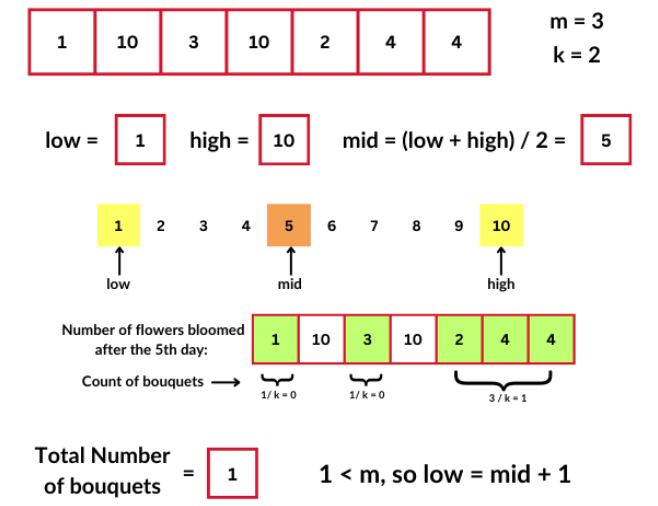
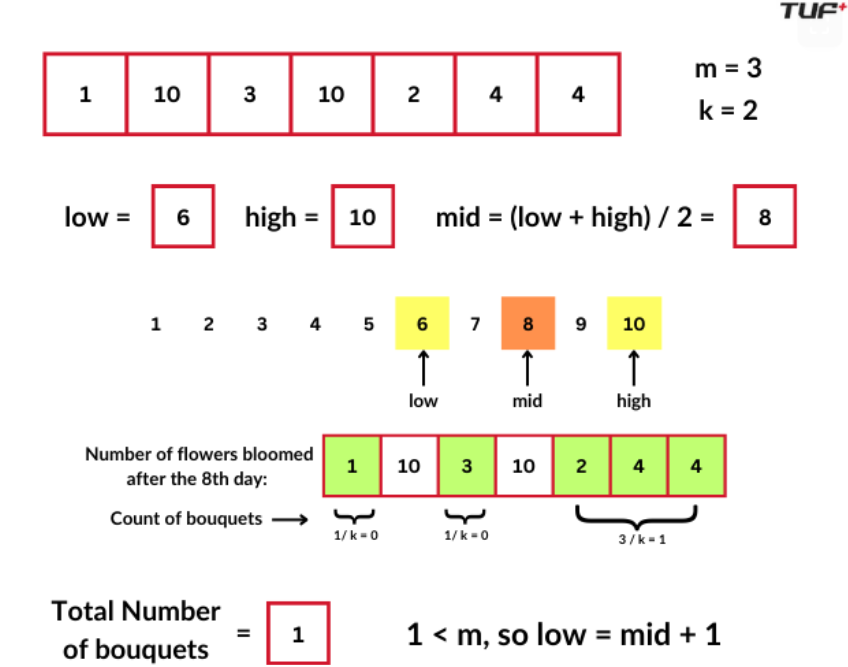
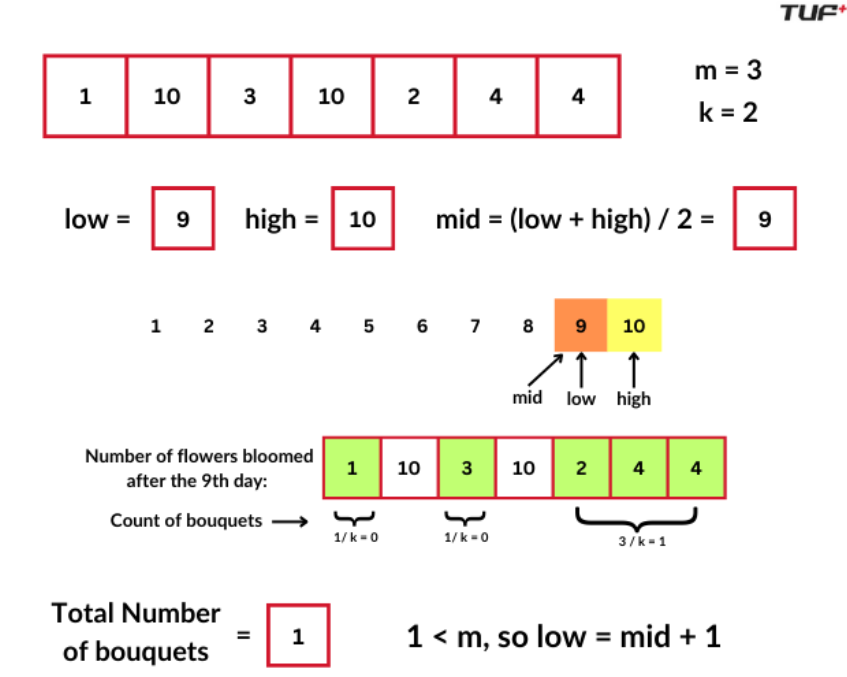
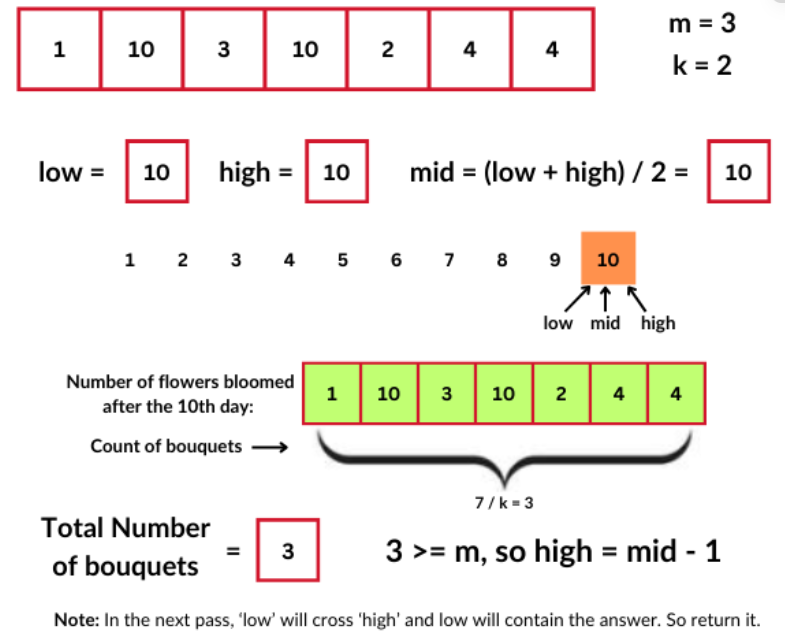

## Binary Search Python Solution

In [32]:
class Solution:
    """Function to check if it's possible to make
    m bouquets with k flowers each on day """
    def possible(self, nums, day, m, k):
        n = len(nums)
        
        # Count of flowers bloomed
        cnt = 0 
        
        # Count of bouquets formed
        noOfB = 0 

        # Count number of bouquets that can be formed
        for i in range(n):
            if nums[i] <= day:
                # Increment flower count
                cnt += 1 
            else:
                """ Calculate number of bouquets
                formed with flowers <= day """
                noOfB += (cnt // k)
                
                # Reset flower count
                cnt = 0 
        
        # Add remaining flowers as a bouquet
        noOfB += (cnt // k) 
        
        """ Return true if enough 
        bouquets can be formed """
        return noOfB >= m 

    """ Function to find the earliest day to
    make m bouquets of k flowers each """
    def roseGarden(self, n, nums, k, m):
        
        """ Calculate the minimum 
        number of flowers required """
        val = m * k 
        
        """ Impossible case: not enough 
            flowers to make m bouquets """
        if val > n:
            return -1 
        
        """ Find maximum and minimum
            bloom days in the array """
        mini = float('inf')
        maxi = float('-inf')
        for num in nums:
            mini = min(mini, num) 
            maxi = max(maxi, num) 
        
        """ Binary search to find the
            earliest day to make m bouquets """
        left = mini 
        right = maxi 
        ans = -1
        while left <= right:
            
            # Calculate the middle day
            mid = left + (right - left) // 2 
            
            """ Check if it's possible to 
                make m bouquets on day mid """
            if self.possible(nums, mid, m, k):
                
                # Update the answer to mid
                ans = mid 
                
                # Try for a smaller day
                right = mid - 1 
            else:
                left = mid + 1 
        
        """ Return the earliest day or 
        -1 if no such day exists"""
        return ans 

In [33]:
if __name__ == "__main__":
    arr = [7, 7, 7, 7, 13, 11, 12, 7] 
    
    n = len(arr)
    
    # Number of flowers per bouquet
    k = 3 
    
    # Number of bouquets needed
    m = 2 

    # Create an instance of the Solution class
    sol = Solution() 
    
    ans = sol.roseGarden(n, arr, k, m) 

    if ans == -1:
        print("We cannot make m bouquets.") 
    else:
        print(f"We can make bouquets on day {ans}") 

We can make bouquets on day 12


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(log(max-min+1) * N), where max is the maximum element of the array, min is the minimum element of the array, N is size of the array.

This is because we are running a loop to check answers that are in the range of [min, max]. For every possible answer, the possible() function is being called. Inside the possible() function, we are traversing the entire array, which results in O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**How is bouquet feasibility checked efficiently?**
```
Use a single pass through the array on day d: Count consecutive roses that bloom on or before d. Reset the count whenever nums[i]>d. Stop early if m bouquets are formed, optimizing the simulation.
```

**Why use binary search to find the minimum days?**
```
Testing each day from 1 to max(nums) linearly has O(n⋅max(nums)) complexity, which is inefficient. Binary search narrows down the range logarithmically, significantly reducing the number of simulations.
```

**How would you handle non-adjacent bouquets?**
```
For non-adjacent bouquets, modify the simulation to track individual roses that bloom on or before d. Count all such roses and check if their total is sufficient to form m⋅k bouquets.
```

**What if the roses bloom asynchronously, with delays or dependencies?**
```
Model blooming as a graph, where edges represent dependencies. Use topological sorting to calculate effective blooming times and then apply the same binary search logic.
```

# 5. Find the Smallest Divisor :

## Problem Statement :

Given an array of integers nums and an integer limit as the threshold value, <b>find the smallest positive integer divisor such that upon dividing all the elements of the array by this divisor, the sum of the division results is less than or equal to the threshold value.</b>

After dividing each element by the chosen divisor, take the ceiling of the result (i.e., round up to the next whole number).


### Examples :

**Example 1:**
```
Input: nums = [1, 2, 3, 4, 5], limit = 8
Output: 3

Explanation: We can get a sum of 15 (1 + 2 + 3 + 4 + 5) if we choose 1 as a divisor. 

The sum is 9 (1 + 1 + 2 + 2 + 3) if we choose 2 as a divisor. Upon dividing all the elements of the array by 3, we get 1,1,1,2,2 respectively. Now, their sum is equal to 7 <= 8 i.e. the threshold value. So, 3 is the minimum possible answer.
```

**Example 2:**
```
Input: nums = [8,4,2,3], limit = 10
Output: 2

Explanation: If we choose 1, we get 17 as the sum. If we choose 2, we get 9 (4+2+1+2) <= 10 as the answer. So, 2 is the answer.
```

```
Constraints:
1 <= nums.length <= 5 * 10^4
1 <= nums[i] <= 10^6
nums.length <= limit <= 10^6
```

# Linear Search

### Intuition

The extremely naive approach is to use Linear Search to check all possible divisors from 1 to maximum element of the array. The minimum number for which the result is less than or equal to threshold value (limit), will be our answer.

### Approach

* Traverse from 1 to maximum element of the array to check all possible divisors.
* Within this loop, divide each element in the array by the current divisor, and sum up the obtained ceiling values.
* If result is less than or equal to threshold, return the current divisor as our answer.
* Finally, if we are outside the nested loops, return -1 as no such divisor is found.

## Linear Search Python Solution

In [36]:
import math

class Solution:
    # Function to find the smallest divisor
    def smallestDivisor(self, nums, limit):
        # Size of array
        n = len(nums)

        # Find the maximum element in nums
        maxi = max(nums)

        # Find the smallest divisor
        for d in range(1, maxi + 1):
            sum = 0

            """ Calculate the sum of ceil
            (nums[i] / d) for all elements """
            for num in nums:
                sum += math.ceil(num / d)

            # Check if the sum is <= limit
            if sum <= limit:
                return d

        # Return -1 if no valid divisor found
        return -1

In [37]:
if __name__ == "__main__":
    nums = [1, 2, 3, 4, 5]
    limit = 8

    # Create an object of the Solution class
    sol = Solution()

    ans = sol.smallestDivisor(nums, limit)

    # Print the result
    print(f"The minimum divisor is: {ans}")

The minimum divisor is: 3


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(max*N), where max is the maximum element in the array, and N is size of the array. This is because nested loops are being used. The outer loop runs from 1 to max and the inner loop runs for N times.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# Binary Search

## Intuition

Here the idea is to use Binary Search to efficiently solve this problem by dividing the search space into halves. This is because the search space of this probem is in the range [1, max], where max is the maximum element of the array. It can be considered as a sorted search space, and hence Binary Search can be applied.

## Approach

### Working of smallestDivisor(nums, limit):

* Iterate using while (low less than or equal to high) to find the smallest divisor.
* Compute mid as the midpoint between low and high. Mid would be representing the current divisor.
* Use the helper function sumByD (nums, mid) to check if the summation of division values for mid is less than or equal to limit, and if yes, eliminate the left half of the search space. Otherwise, eliminate the right half, as we need to find a greater divisor.

### Working of sumByD(nums, limit):

* Initialize 'n' to the size of nums, 'sum' is initialized to zero, which will accumulate the sum of division results.
* Iterate through each element in the array using a for-loop. For each element, the division result is computed. This division result is cast to double to ensure floating-point precision. The ceil function is applied to round up the division result to the nearest integer. This ensures that even if there's a fractional part, it is rounded up.
* The rounded-up division result is added to 'sum' in each iteration of the loop. This accumulates the total sum of all such rounded-up division results for all elements in nums.
* Finally, after iterating through all elements in array, we can finally return the accumulated sum, which represents the total sum of division results rounded up to the nearest integer for each element divided by limit.

## Binary Search Python Solution

In [38]:
import math

class Solution:
    """ Helper function to find the 
    summation of division values"""
    def sumByD(self, nums, limit):
        # Size of array
        n = len(nums)  
        
        # Find the summation of division values
        sum_val = 0
        for num in nums:
            sum_val += math.ceil(num / limit)
        return sum_val

    # Function to find the smallest divisor
    def smallestDivisor(self, nums, limit):
        n = len(nums)
        if n > limit:
            return -1
        
        # Initialize binary search bounds
        low = 1
        high = max(nums)

        # Apply binary search
        while low <= high:
            mid = (low + high) // 2
            if self.sumByD(nums, mid) <= limit:
                high = mid - 1
            else:
                low = mid + 1
        #Return the answer
        return low

In [39]:
if __name__ == "__main__":
    nums = [1, 2, 3, 4, 5]
    limit = 8

    # Create an object of the Solution class
    sol = Solution()

    ans = sol.smallestDivisor(nums, limit)

    # Print the result
    print(f"The minimum divisor is: {ans}")

The minimum divisor is: 3


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(log(max)*N), where max is the maximum element in the array, and N is the size of the array.

We are applying Binary Search on our answers that are in the range of [1, max]. For every possible divisor ‘mid’, we are calling the sumByD() function. Inside that function we are traversing the entire array, which results in O(N) time complexity.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**How does the rounding work for division?**
```
Instead of using ceil(nums[i]/d), compute (nums[i]+d−1)//d. This avoids floating-point arithmetic and directly calculates the rounded-up integer value.
```

**What happens if the threshold is very high?**
```
If the threshold is larger than or equal to the sum of elements when divided by 1 (i.e., ∑(nums)), the smallest divisor is 1, as no larger divisor is required.
```

**What if you need the largest divisor instead of the smallest?**
```
Reverse the Binary Search logic to prioritize larger divisors. Use the same sum calculation but adjust the bounds to find the maximum d that satisfies the condition.
```

**How would you optimize this for extremely large datasets?**
```
Divide the array into chunks, calculate partial sums for each chunk, and combine them dynamically during the binary search. This reduces memory usage and ensures scalability.
```

# 6. Capacity to Ship Packages within D days :

## Problem Statement :

You are given an array <b>weights</b> where weights[i] represents the weight of the i-th package on a conveyor belt. All the packages must be shipped in the order given from one port to another within days.

Each day, the ship can carry a contiguous sequence of packages, as long as the total weight does not exceed its maximum capacity.

<b>Your task is to find the minimum possible capacity of the ship so that all packages can be shipped within the given number of days.</b>


### Examples :

**Example 1:**
```
Input: weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], days = 5
Output: 15

Explanation:

Minimum ship capacity = 15. One way to ship in 5 days:
Day 1: 1 + 2 + 3 + 4 + 5 = 15
Day 2: 6 + 7 = 13
Day 3: 8
Day 4: 9
Day 5: 10

No day exceeds capacity 15 and all packages are shipped in order in 5 days.
```

**Example 2:**
```
Input: weights = [3, 2, 2, 4, 1, 4], days = 3
Output: 6

Explanation:

One possible division with capacity 6:
Day 1: 3 + 2 = 5
Day 2: 2 + 4 = 6
Day 3: 1 + 4 = 5

All packages shipped in order within 3 days.
```

**Example 3:**
```
Input: weights = [10, 50, 50, 10], days = 2
Output: 60

```
```
Constraints:
1 <= days <= weights.length <= 5 * 10⁴
1 <= weights[i] <= 500
```

# Brute Force Solution

### Intuition

Shipping packages in order while respecting a daily weight limit is like trying to pack boxes into a container without exceeding its capacity. A straight forward approach is to test every possible ship capacity starting from the maximum single package weight up to the sum of all package weights. For each capacity, we simulate the shipping process day by day, adding packages until adding the next one would exceed the current capacity. If we can ship all packages within the given number of days for that capacity, it’s valid. The smallest such valid capacity is our answer.

### Approach

* Determine the minimum possible capacity as the maximum weight of a single package.
* Determine the maximum possible capacity as the sum of all package weights.

* For each capacity from min to max (inclusive), do the following:

```
Initialize a counter for days used and current weight for the day. Iterate over all packages in order:

If adding the current package exceeds the current capacity, increment the day counter and reset current weight to the package's weight.
Otherwise, add the package's weight to the current day's total.
If the number of days used exceeds the allowed days, this capacity is invalid.
```

* The first capacity that allows shipping all packages within the given days is the minimum required ship capacity.

## Dry Run

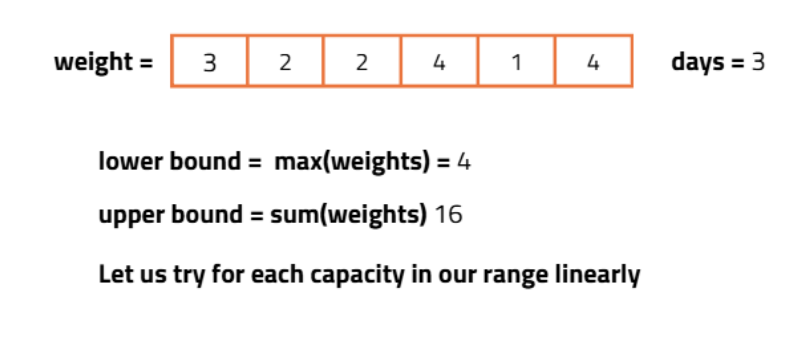
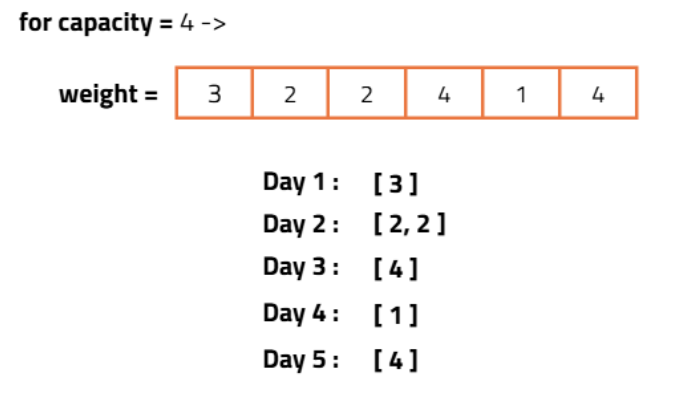
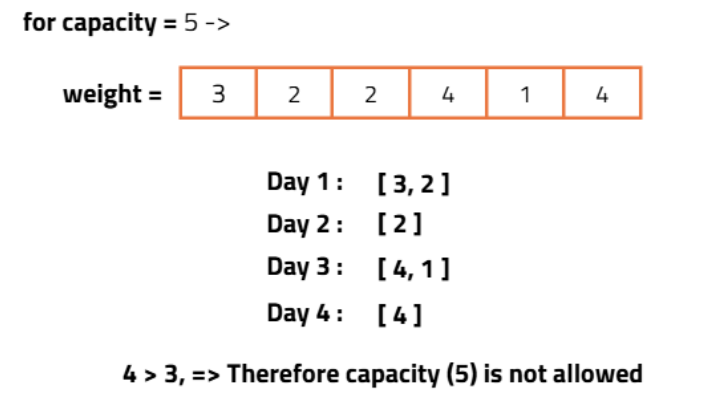
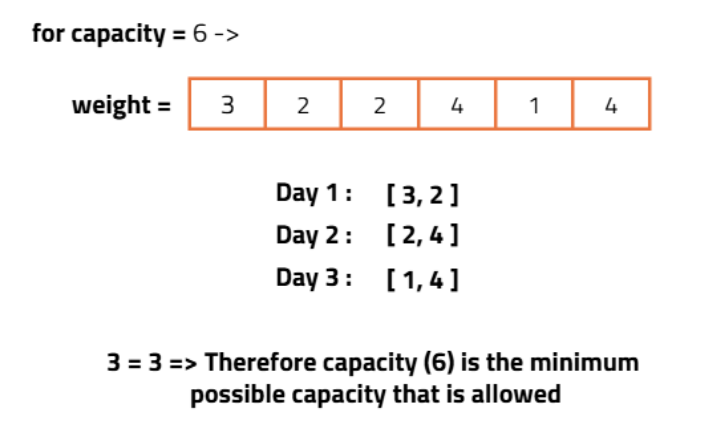

## Brute Force Python Solution

In [41]:
from typing import List

class Solution:
    # Function to find minimum capacity
    def shipWithinDays(self, weights: List[int], days: int) -> int:
        # Find minimum capacity as max weight
        left = max(weights)
        # Find maximum capacity as sum of all weights
        right = sum(weights)

        # Brute force: try each capacity
        for cap in range(left, right + 1):
            # Initialize required days and current load
            required_days = 1
            current_load = 0

            # Iterate over each package
            for w in weights:
                # If adding package exceeds capacity
                if current_load + w > cap:
                    # Start a new day
                    required_days += 1
                    current_load = w
                else:
                    # Add to current day's load
                    current_load += w

            # If total days fit allowed days, return capacity
            if required_days <= days:
                return cap

        # Fallback
        return right

In [42]:
# Driver
sol = Solution()
weights = [1,2,3,4,5,6,7,8,9,10]
days = 5
print(sol.shipWithinDays(weights, days))

15


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O((sumW - max(weights)) * n).

Here, n is the number of packages and sumW is the sum of all package weights. We try each possible capacity from the maximum single package weight up to the total weight, and for each capacity we traverse all packages once.
```

**Space Complexity:**
```
The Space Complexity will be O(1), as we only use a few variables to track the current load and number of days. No additional data structures proportional to n are used.
```

# Optimal Solution

### Intuition

We want to find the minimum ship capacity that allows us to ship all packages within the given number of days. Instead of checking every possible capacity linearly, we notice that if a certain capacity works, any larger capacity will also work, and if it doesn’t work, any smaller capacity will fail. This monotonic property allows us to use Binary Search. We search between the maximum single package weight (lowest possible capacity) and the total sum of all weights (highest possible capacity), checking for each mid-value whether it can ship all packages within the given days. This efficiently narrows down to the minimum feasible capacity.

### Approach

* Set the lower bound as the maximum weight in the array (min possible ship capacity).
* Set the upper bound as the sum of all weights (max possible ship capacity).
* Perform binary search while lower bound ≤ upper bound. Simulate shipping packages with capacity = mid :

```
Iterate through the weights sequentially, summing them for the current day.
If the sum exceeds mid, start a new day and continue.
If total days used ≤ given days, mid capacity works; try smaller capacity (high = mid - 1).
If total days used > given days, mid capacity is too small; try larger capacity (low = mid + 1).
Return the smallest capacity that works.
```

## Optimal Python Solution

In [43]:
class Solution:
    # Check if all packages can be shipped within given days
    def canShip(self, weights: list[int], days: int, capacity: int) -> bool:
        # Initialize required days
        required_days = 1
        # Initialize current load
        curr_load = 0
        # Iterate through all weights
        for w in weights:
            # Start new day if capacity exceeded
            if curr_load + w > capacity:
                required_days += 1
                curr_load = 0
            # Add weight to current load
            curr_load += w
        # Return true if within allowed days
        return required_days <= days

    # Find minimum ship capacity
    def shipWithinDays(self, weights: list[int], days: int) -> int:
        # Lower bound: max weight
        low = max(weights)
        # Upper bound: sum of weights
        high = sum(weights)
        # Initialize answer
        ans = high
        # Binary search
        while low <= high:
            mid = low + (high - low) // 2
            # Check if mid capacity is sufficient
            if self.canShip(weights, days, mid):
                ans = mid
                high = mid - 1
            else:
                low = mid + 1
        # Return minimum capacity
        return ans

In [44]:
# Driver code
weights = [1,2,3,4,5,6,7,8,9,10]
days = 5
sol = Solution()
print(sol.shipWithinDays(weights, days))  # Output: 15

15


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n * log(sum(weights) - max(weights))), where n is the number of packages.

This is because we perform a Binary Search between the maximum single package weight and the sum of all weights, and for each candidate capacity we traverse all packages once to check feasibility.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as we only use a few variables to track the current load and number of days. No additional data structures proportional to n are used.
```

# 7. Kth Missing Positive Number :

## Problem Statement :

Given a sorted array of unique positive integers arr, your task is to return the kᵗʰ missing positive number that is not present in arr.

The array is guaranteed to be strictly increasing, and the missing numbers are those positive integers that do not appear in arr but would appear in a full sequence starting from 1.


### Examples :

**Example 1:**
```
Input: arr = [3, 5, 7, 10], k = 6
Output: 9

Explanation:
The missing numbers are [1, 2, 4, 6, 8, 9, 11, ...]. The 6ᵗʰ missing number is 9.
```

**Example 2:**
```
Input: arr = [1, 4, 6, 8, 9], k = 3
Output: 5

Explanation:
The missing numbers are [2, 3, 5, 7, 10, ...]. The 3ʳᵈ missing number is 5.
```

```
Constraints:
1 <= arr.length <= 1000
1 <= arr[i] <= 1000
1 <= k <= 1000
arr[i] < arr[j] for all 1 <= i < j <= arr.length
```

# Linear Search

### Intuition

Imagine the sorted array as a line of houses numbered starting from 1, but some house numbers are missing. Your task is to find the kᵗʰ missing house. As you walk along the array, at each position, you can compare the actual house number with the number you would expect if no houses were missing. The difference tells you how many houses are missing so far. Once the count of missing houses reaches k, you know the exact number of the kᵗʰ missing house. If you reach the end of the array and still haven’t counted up to k, the remaining missing houses must lie beyond the last house. This way, you can find the kᵗʰ missing number efficiently without listing all missing numbers.

### Approach

* Initialize a counter for missing numbers.
* Traverse the array, comparing each element with its expected value (index + 1).
* Compute how many numbers are missing up to the current element by subtracting expected from actual.
* When the count of missing numbers reaches or exceeds k, the kᵗʰ missing number lies between the previous and current elements.
* If the count of missing numbers is less than k after traversing the array, the kᵗʰ missing number is beyond the last element and can be computed accordingly.

## Dry Run

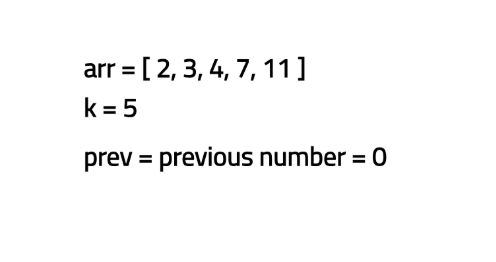
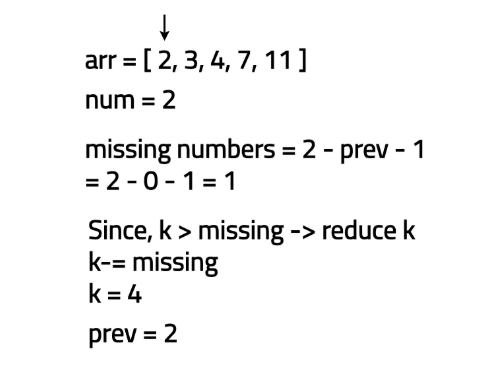
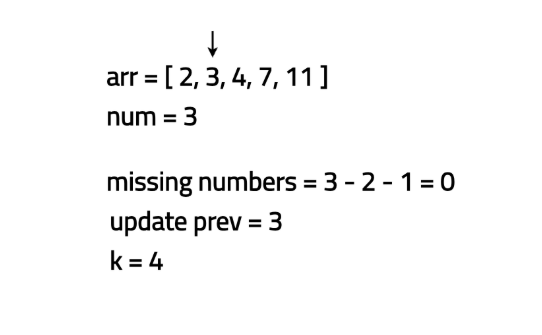
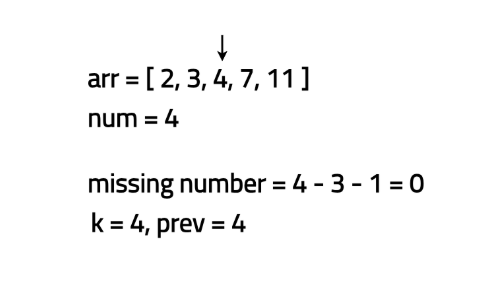
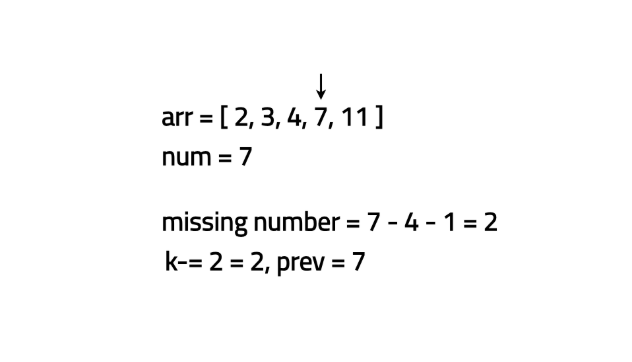
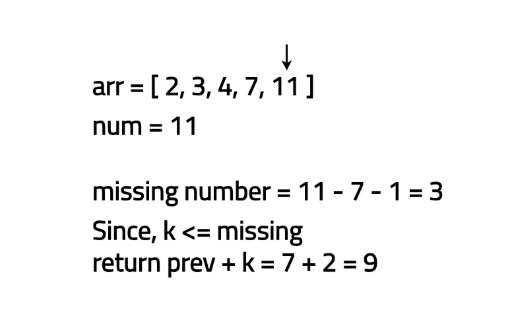

## Linear Search Python Solution

In [45]:
# Solution class
class Solution:
    # Function to find k-th missing positive number
    def find_kth_positive(self, arr, k):
        # Initialize previous number to 0
        prev = 0
        # Iterate over the array
        for num in arr:
            # Count missing numbers between prev and current
            missing = num - prev - 1
            # If k is within the missing numbers
            if k <= missing:
                return prev + k
            # Reduce k by missing numbers
            k -= missing
            # Update previous number
            prev = num
        # If k is still positive, missing number is beyond last element
        return prev + k

In [47]:
# Driver code
if __name__ == "__main__":
    # Create solution object
    sol = Solution()
    # Initialize array and k
    arr = [2, 3, 4, 7, 11]
    k = 5
    # Find and print k-th missing positive
    print(sol.find_kth_positive(arr, k))  # Output: 9

9


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n) where n is the length of the array, because we iterate through the array once to count missing numbers.
```

**Space Complexity:**
```
The Space Complexity will be O(1) since only a constant amount of extra space is used for variables, independent of the input size.
```

# Binary Search

### Intuition

Think of the sorted array as checkpoints in a complete sequence starting from 1. If there were no missing numbers, the i-th position (0-based) should hold the value i + 1.

The difference between the actual value arr[i] and its expected value (i + 1) tells us how many numbers are missing up to that index:

```
missing(i) = arr[i] − (i+1)
```

This count is monotonic (it never decreases as we move right), so we can use Binary Search to find the smallest index where missing(i) ≥ k.

```
If k is larger than all missing counts, the k-th missing number lies beyond the last element, and we can compute it directly as k + n (where n is the array length).
Otherwise, once we find that index, the answer is k + index because each index shifts the missing count by one.
```

### Approach

* If k > arr[-1] - n (missing count before last element), return k + n.
* Initialize low = 0, high = n - 1.

* While low <= high:

```
Compute mid = (low + high) // 2.
Calculate missing(mid) = arr[mid] - (mid + 1).
If missing(mid) >= k, move left (high = mid - 1) and record mid as candidate.
Else, move right (low = mid + 1).
```

* After Binary search, the leftmost index where missing count ≥ k is ans_idx.
* The k-th missing number = k + ans_idx.

## Binary Search Python Solution

In [51]:
from typing import List

class Solution:
    def findKthPositive(self, arr: List[int], k: int) -> int:
        n = len(arr)

        # If kth missing is beyond the last element
        if k > arr[-1] - n:
            return k + n

        # Binary search for the leftmost index with missing(i) >= k
        low, high = 0, n - 1
        ans = -1

        while low <= high:
            mid = (low + high) // 2
            missing = arr[mid] - (mid + 1)

            if missing >= k:
                ans = mid      # candidate index
                high = mid - 1     # try to find an even smaller index
            else:
                low = mid + 1

        # At the leftmost index where missing(i) >= k,
        # the kth missing number equals k + index.
        return k + ans

In [52]:
# Driver code
if __name__ == "__main__":
    # Create solution object
    sol = Solution()
    # Initialize array and k
    arr = [2, 3, 4, 7, 11]
    k = 5
    # Find and print k-th missing positive
    print(sol.findKthPositive(arr, k))  # Output: 9

9


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(log n), since we are performing Binary Search on the entire array.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# 8. Aggressive Cows :

## Problem Statement :

Given an array nums of size n, which denotes the positions of stalls, and an integer k, which denotes the number of aggressive cows, assign stalls to k cows such that the minimum distance between any two cows is the maximum possible. <b>Find the maximum possible minimum distance.</b>


### Examples :

**Example 1:**
```
Input: n = 6, k = 4, nums = [0, 3, 4, 7, 10, 9]
Output: 3

Explanation:
The maximum possible minimum distance between any two cows will be 3 when 4 cows are placed at positions [0, 3, 7, 10]. Here the distances between cows are 3, 4, and 3 respectively. In no manner can we increase the minimum distance beyond 3.
```

**Example 2:**
```
Input : n = 5, k = 2, nums = [4, 2, 1, 3, 6]
Output: 5
Explanation: The maximum possible minimum distance between any two cows will be 5 when 2 cows are placed at positions [1, 6]. 
```

```
Constraints:
2 <= n <= 10^5
2 <= k <= n
0 <= nums[i] <= 10^9
```

# Linear Search

## Intuition

The extremely naive approach is to use Linear Search to check all possible distances from 1 to (max-min) where, max is the maximum element of the array and min is the minimum element of the array. The maximum distance for which the cows can be placed will be our answer.

## Approach

### Working of aggresiveCows(nums, k):

* First, sort the arrays and find out the range of the search space, the range will be from [1, (max-min)]. Where max is the maximum element of the array and min is the minimum element of the array. Every number in this range is a possible distance between the cows.
* Traverse through the search space and for each possible distance call the canWePlace() function. If the function returns false, then that means the maximum distance is the (current distance - 1) for which the cows can be placed.
* If no such distance is found, then return the (max-min) as answer.

### Working of canWePlace(nums, dist, cow):

* Start by getting the size of the array and store it in 'n'. Initialize 'cntCows' to 1, indicating the number of cows already placed (starting with the first cow). Also initialize 'last' to first element of array, which represents the position of the last placed cow.
* Iterate through the array and check if the distance between the current position and the last placed cow is greater than or equal to dist. If true, it means you can place another cow at current position. Increment 'cntCows' to reflect placing another cow. Update 'last' to current element, marking current element as the position of the last placed cow.
* If the loop completes without placing all cows (cntCows < cows), return false, indicating it's not possible to place all cows with at least dist distance apart.

## Linear Search Python Solution

In [53]:
class Solution:
    """Function to check if we can place 'cows' 
    cows with at least 'dist' distance apart"""
    def canWePlace(self, nums, dist, cows):
        # Size of array
        n = len(nums)
        
        # Number of cows placed
        cntCows = 1
        
        # Position of last placed cow
        last = nums[0]
        for i in range(1, n):
            if nums[i] - last >= dist:
                # Place next cow
                cntCows += 1
                
                # Update the last location
                last = nums[i]
            if cntCows >= cows:
                return True
                
        return False

    """ Function to find the maximum possible minimum
    distance 'k' cows can have between them in 'nums'"""
    def aggressiveCows(self, nums, k):
        # Size of array
        n = len(nums)
        
        # Sort the nums
        nums.sort()
        
        limit = nums[-1] - nums[0]
        for i in range(1, limit + 1):
            if not self.canWePlace(nums, i, k):
                return i - 1

        # We are using "not self.canWePlace" here because for distance (i) = 4 in our example it becomes infeasible to place 4 cows. So we return 3.
        # Return the answer
        return limit

In [54]:
if __name__ == "__main__":
    nums = [0, 3, 4, 7, 10, 9]
    k = 4
    
    # Create an instance of the Solution class
    sol = Solution()
    
    ans = sol.aggressiveCows(nums, k)
    
    # Output the result
    print("The maximum possible minimum distance is:", ans)

The maximum possible minimum distance is: 3


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(NlogN) + O(N *(max-min)), where N is size of the array, max is the maximum element in array, min is the minimum element in array.

This is because O(NlogN) Time Complexity is for sorting the array. The loop runs for 1 to (max-min) to check all possible distances. Inside the loop, canWePlace() function is being called for each distance. Now, inside the canWePlace() function, the loop runs for N times.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# Binary Search

## Intuition

Here, the idea is to use binary search as the search range from [1 , max-min] is sorted. So, the Brute Force Solution can be optimized by dividing the space into two halves: one consisting of potential answers and the other of non-viable options.

## Approach

### Working of aggresiveCows(nums, k):

* First, sort the array. Sorting is crucial as it allows us to efficiently apply binary search later, focusing on maximizing the minimum distance between cows.
* Initialize low as 1, which represents the minimum possible distance between any two cows and initialize high as the maximum possible distance between the first and the last stall (difference between the first and last element of the sorted array).
* Iterate the search space using a while loop till low is less than or equal to high. Calculate the mid point as the average of low and high. Use the canWePlace function to check if it's possible to place all cows with at least mid distance apart.
* If placing cows with mid distance apart is possible (canWePlace returns true), update low to mid + 1 to search for potentially larger distances. Else, update high to mid - 1 to search for smaller distances.
* Once the binary search concludes (low > high), high holds the maximum distance that can be achieved while still allowing cows to be placed (high is the largest distance where canWePlace was successful).

### Working of canWePlace(nums, dist, cow):

* Start by getting the size of the array and store it in 'n'. Initialize 'cntCows' to 1, indicating the number of cows already placed (starting with the first cow). Also initialize 'last' to first element of array, which represents the position of the last placed cow.
* Iterate through the array and check if the distance between the current position and the last placed cow is greater than or equal to dist. If true, it means you can place another cow at current position. Increment 'cntCows' to reflect placing another cow. Update 'last' to current element, marking current element as the position of the last placed cow.
* If the loop completes without placing all cows (cntCows < cows), return false, indicating it's not possible to place all cows with at least dist distance apart.

## Dry Run

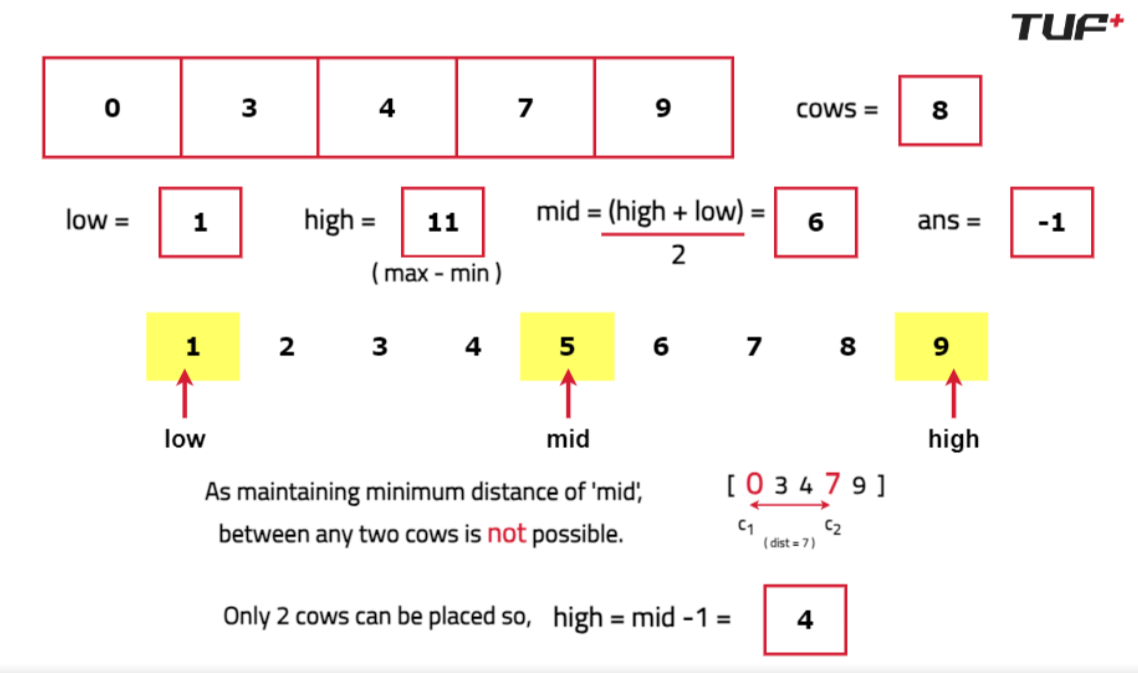
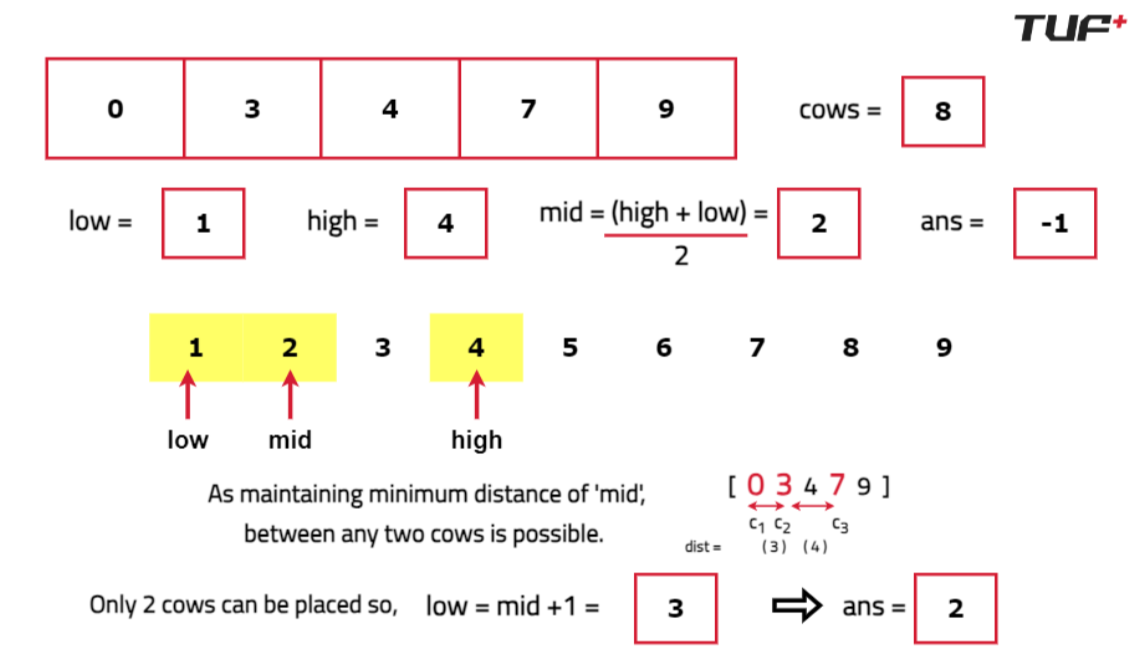
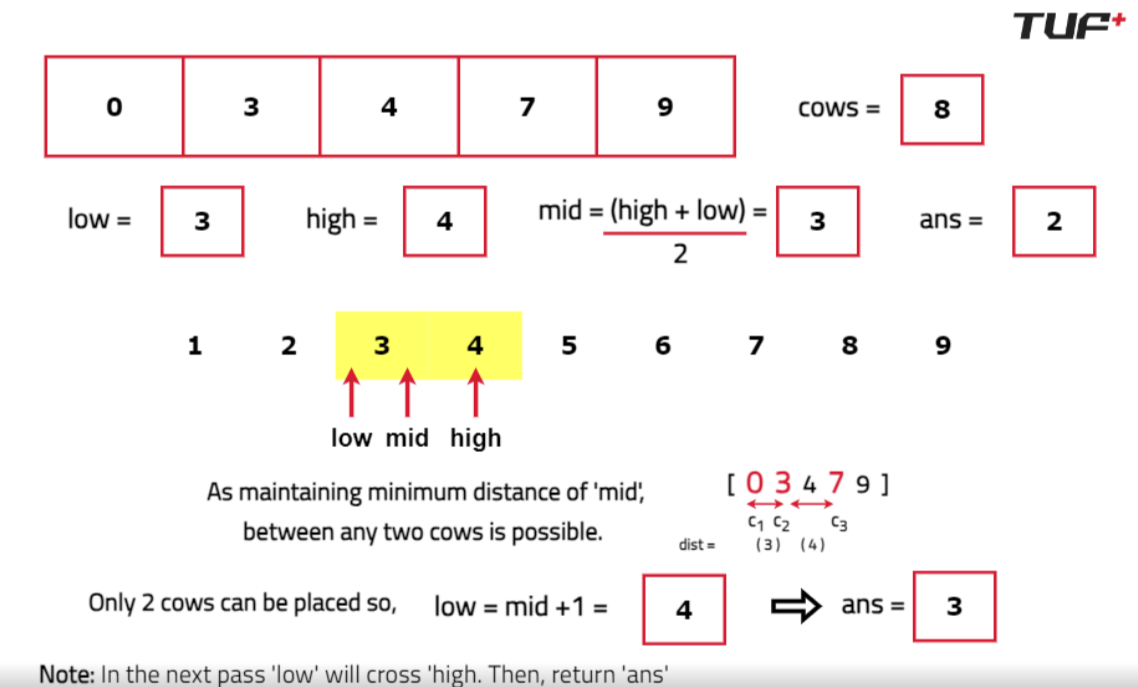

## Binary Search Python Solution

In [57]:
class Solution:
    """Function to check if we can place 'cows' 
    cows with at least 'dist' distance apart"""
    def canWePlace(self, nums, dist, cows):
        # Size of array
        n = len(nums)
        
        # Number of cows placed
        cntCows = 1
        
        # Position of last placed cow
        last = nums[0]
        for i in range(1, n):
            if nums[i] - last >= dist:
                # Place next cow
                cntCows += 1
                
                # Update the last location
                last = nums[i]
            if cntCows >= cows:
                return True
                
        return False

    """ Function to find the maximum possible minimum
    distance 'k' cows can have between them in 'nums'"""
    def aggressiveCows(self, nums, k):
        # Size of array
        n = len(nums)
        
        # Sort the nums
        nums.sort()
        
        low = 1
        high = nums[n - 1] - nums[0]
        ans = -1
        
        # Apply binary search
        while low <= high:
            mid = (low + high) // 2
            if self.canWePlace(nums, mid, k):
                ans = mid
                low = mid + 1
            else:
                high = mid - 1
        return ans

In [58]:
if __name__ == "__main__":
    nums = [0, 3, 4, 7, 10, 9]
    k = 4
    
    # Create an instance of the Solution class
    sol = Solution()
    
    ans = sol.aggressiveCows(nums, k)
    
    # Output the result
    print("The maximum possible minimum distance is:", ans)

The maximum possible minimum distance is: 3


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(NlogN) + O(N * log(max-min)), where N is size of the array, max is the maximum element in array, min is the minimum element in array.

This is because O(NlogN) Time Complexity is for sorting the array. Remaining is because Binary Search is applied, which runs for 1 to (max-min) to check all possible distances, so O(log(max-min)). Inside the loop, canWePlace() function is being called for each distance. Now, inside the canWePlace() function, the loop runs for N times.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**Why sort the stalls?**
```
Sorting ensures the stalls are in sequential order, which is necessary to calculate the distance between adjacent stalls. Without sorting, the distance calculations would be incorrect, making placement infeasible.
```

**What is the feasibility function?**
```
The feasibility function checks if it is possible to place k cows such that the minimum distance between any two cows is mid. This involves greedily placing cows in the stalls and counting how many can be placed.
```

**What if there are constraints on stall availability?**
```
If some stalls are unavailable, exclude them from the sorted list. Adjust the feasibility function to skip unavailable stalls during placement.
```

**How would you handle dynamic updates to the stalls?**
```
Use a data structure like a balanced binary search tree to maintain the sorted order of stall positions dynamically. Update the tree and re-evaluate the feasibility function as stalls are added or removed.
```

# 9. Book Allocation Problem :

## Problem Statement :

Given an array nums of n integers, where nums[i] represents the number of pages in the i-th book, and an integer m representing the number of students, allocate all the books to the students so that each student gets at least one book, each book is allocated to only one student, and the allocation is contiguous.

<b>Allocate the books to m students in such a way that the maximum number of pages assigned to a student is minimized.</b> 

If the allocation of books is not possible, return -1.


### Examples :

**Example 1:**
```
Input: nums = [12, 34, 67, 90], m=2
Output: 113

Explanation:
The allocation of books will be 12, 34, 67 | 90. One student will get the first 3 books and the other will get the last one.
```

**Example 2:**
```
Input: nums = [25, 46, 28, 49, 24], m=4
Output: 71

Explanation: The allocation of books will be 25, 46 | 28 | 49 | 24.
```

```
Constraints:
1 <= n, m <= 10^4
1 <= nums[i] <= 10^5
```

# Linear Search

## Intuition

The extremely naive approach is to check all possible pages from max element of the array to sum of all the elements of the array. The minimum pages for which all the books can be allocated to M students will be our answer.

## Approach

### Working of findPages(nums, m):

* Edge case: If the number of students given is greater than the total number of books, then the allocation is impossible and we can directly return -1 as answer.
* First, find the range of the search space, which will be [low, high], where low is the maximum element of the array and high is the sum of all elements of the array.
* Now, iterate from low to high using a for loop. Inside this loop we can call the countStudent() function to get the number of students to whom books can be allocated.
* If the value returned from the helper function is less than or equal to the given limit (m) then return the current value of the iteration.
Finally, if no suitable answer is found then return low (max element of the array) as an answer.


### Working of countStudents(nums, pages):

* Start by getting the size of the array nums and store it in the variable 'n'. Initialize students to 1, assuming at least one student is required and also initialize pagesStudent to 0, which will keep track of the total number of pages assigned to the current student.
* Iterate through the array and check if adding current element to pagesStudent will keep the total pages assigned to the current student within the limit specified by pages. If true, add the current element to pagesStudent, indicating that the current student can handle these additional pages.
* If adding the current element would exceed the limit pages, it indicates that a new student is needed to handle these pages. Increment the students counter to account for the new student. Reset pagesStudent to the current element, starting a new student with the current element's pages. Finally, return the 'student' variable.

## Linear Search Python Solution

In [ ]:
class Solution:
    """Function to count the number of 
    students required given the maximum 
    pages each student can read"""
    def countStudents(self, nums, pages):
        # Size of array
        n = len(nums)
        
        students = 1
        pagesStudent = 0
        
        for i in range(n):
            if pagesStudent + nums[i] <= pages:
                # Add pages to current student
                pagesStudent += nums[i]
            else:
                # Add pages to next student
                students += 1
                pagesStudent = nums[i]
        
        return students
    
    """Function to allocate the book to ‘m’ 
    students such that the maximum number 
    of pages assigned to a student is minimum"""
    def findPages(self, nums, m):
        n = len(nums)
        
        # Book allocation impossible
        if m > n:
            return -1
        
        # Calculate the range for binary search
        low = max(nums)
        high = sum(nums)
        
        # Linear search for minimum maximum pages
        for pages in range(low, high + 1):
            if self.countStudents(nums, pages) <= m:
                return pages
        
        return low

In [ ]:
if __name__ == "__main__":
    arr = [25, 46, 28, 49, 24]
    m = 4

    # Create an instance of the Solution class
    sol = Solution()

    ans = sol.findPages(arr, m)

    # Output the result
    print("The answer is:", ans)

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N * (sum-max)), where N is size of the array, sum is the sum of all array elements, max is the maximum of all array elements.
This is becauses the loop runs from max to sum to check all possible numbers of pages. Inside the loop, the countStudents() function is being called for each number, and the loop inside this runs for N times.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# Binary Search

## Intuition

Here, the idea is to use Binary Search algorithm to optimize the Brute Force Solution which was using Linear Search algorithm. The answer space, represented as [max element, sum of all elements], is actually sorted and hence, Binary Search algorithm can be applied here. Based on certain conditions, the search space can be divided into halves in each iteration thus enhancing the overall time complexity.

## Approach

### Working of findPages(nums, m):

* Edge case: If the number of students given is greater than the total number of books, then the allocation is impossible and we can directly return -1 as the answer.
* Take two pointers, low and high. Initialize low to max (maximum element of the array) and high to sum (sum of all the elements of the array). The range from [low,high] will define the search space.
* Now, initialize a while loop, which runs till low is less than or equal to high. Inside this loop calculate the 'mid' by using mid = (low+high) // 2 ( ‘//’ refers to integer division). The mid will be the defining the minimum possible maximum pages that can be allocated to any student.
* Calculate students by using the countStudents function, which determines how many students are needed if each student can read up to 'mid' pages.
* If the number of students required is greater than m, it means mid (the maximum pages assigned to a student) is too small. More pages are needed, so we need to increase the value of low (i.e., low = mid + 1). If the number of students required is less than or equal to m, it means mid might be a valid solution, so we try to minimize it by adjusting high = mid - 1.
* After the binary search concludes (low > high), low will represent the minimum possible maximum pages that can be allocated to any student while ensuring m or fewer students are needed. Return low as the result.

### Working of countStudents(nums, pages):

* Start by getting the size of the array nums and store it in 'n'. Initialize students to 1, assuming at least one student is required and also initialize pagesStudent to 0, which will keep track of the total number of pages assigned to the current student.
* Iterate through the array and check if adding current element to pagesStudent will keep the total pages assigned to the current student within the limit specified by pages. If true, add the current element to pagesStudent, indicating that the current student can handle these additional pages.
* If adding the current element would exceed the pages limit, it indicates that a new student is needed to handle these pages. Increment the students counter to account for the new student. Reset pagesStudent to the current element, starting a new student with the current element's pages. Finally, return the 'student' variable.

## Dry Run

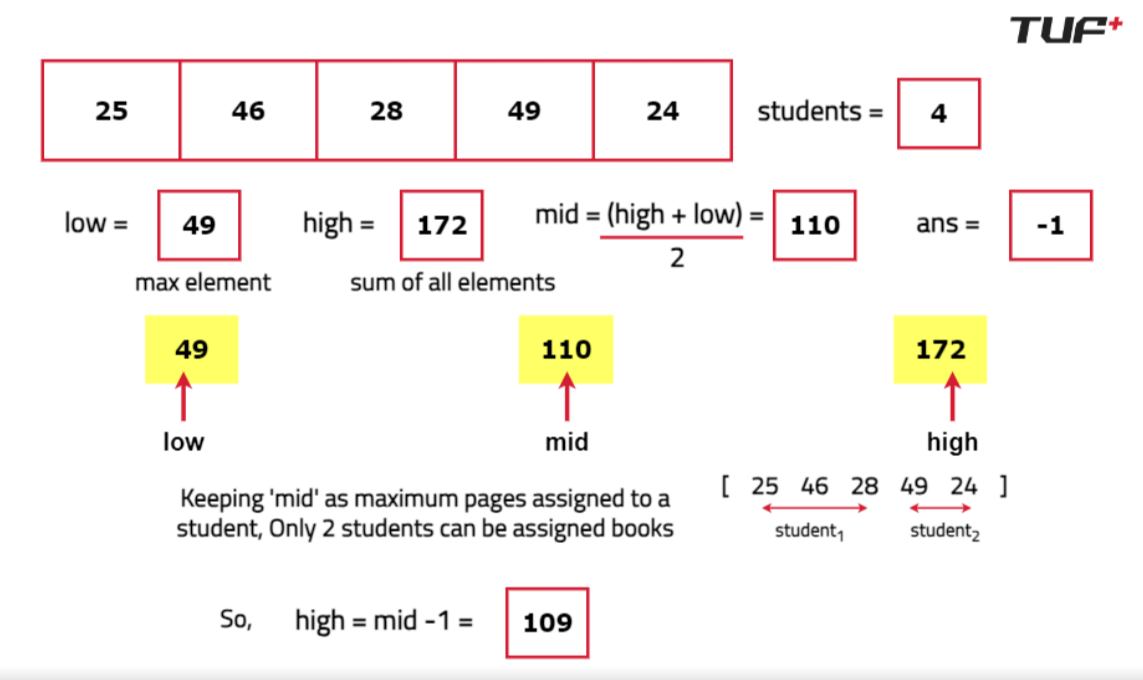
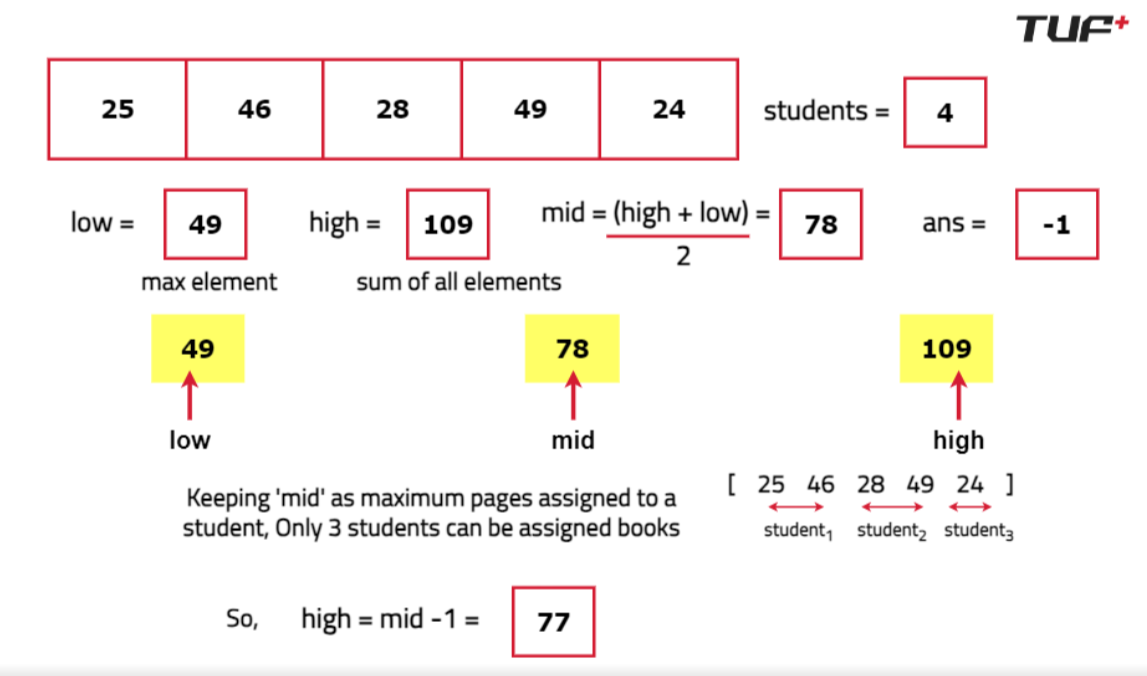
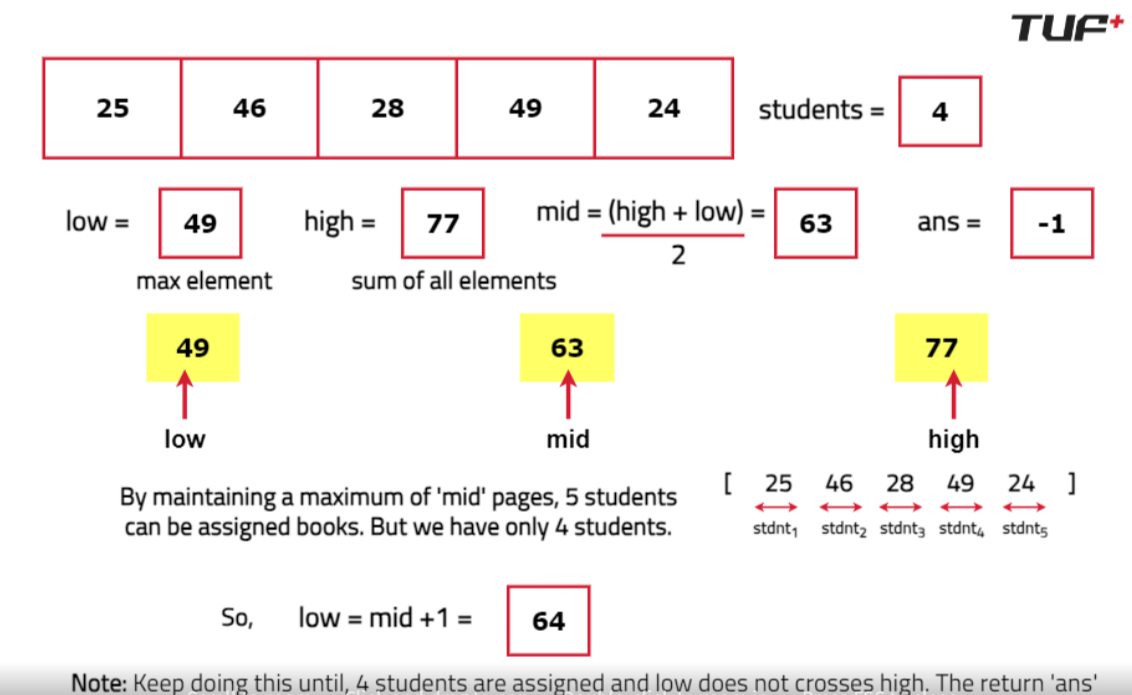

## Binary Search Python Solution

In [61]:
class Solution:
    """Function to count the number of 
    students required given the maximum 
    pages each student can read"""
    def countStudents(self, nums, pages):
        # Size of array
        n = len(nums)
        
        students = 1
        pagesStudent = 0
        
        for i in range(n):
            if pagesStudent + nums[i] <= pages:
                # Add pages to current student
                pagesStudent += nums[i]
            else:
                # Add pages to next student
                students += 1
                pagesStudent = nums[i]
        
        return students
    
    """Function to allocate the book to ‘m’ 
    students such that the maximum number 
    of pages assigned to a student is minimum"""
    def findPages(self, nums, m):
        n = len(nums)
        
        # Book allocation impossible
        if m > n:
            return -1
        
        # Calculate the range for binary search
        low = max(nums)
        high = sum(nums)
        
        # Binary search for minimum maximum pages
        while low <= high:
            mid = (low + high) // 2
            students = self.countStudents(nums, mid)
            if students > m:
                low = mid + 1
            else:
                high = mid - 1
                
        return low

In [62]:
if __name__ == "__main__":
    arr = [25, 46, 28, 49, 24]
    m = 4

    # Create an instance of the Solution class
    sol = Solution()

    ans = sol.findPages(arr, m)

    # Output the result
    print("The answer is:", ans)

The answer is: 71


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N * log(sum-max)), where N is size of the array, sum is the sum of all array elements, max is the maximum of all array elements.

This is because Binary Search is being applied on [max, sum]. Inside the loop, we are calling the countStudents() function for the value of ‘mid’. Now, inside the countStudents() function, the loop runs for N times.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**How is the feasibility function implemented?**
```
Start with the first student and a running sum of pages. Add books until the sum exceeds mid, and then allocate a new student. If the number of students exceeds m, return false. Otherwise, return true.
```

**What is the significance of max(nums) and sum(nums) as bounds?**
```
The lower bound max(nums) ensures that no student is assigned less than the largest book. The upper bound sum(nums) represents the scenario where one student gets all the books.
```

**What if the students have varying reading capacities?**
```
Incorporate the reading capacities into the feasibility function by limiting the maximum pages each student can handle. Adjust the binary search accordingly to account for these constraints.
```

**What if the number of books or students changes dynamically?**
```
For dynamic updates, maintain a prefix sum array of book pages. Use this to quickly calculate the total pages in any contiguous subarray, speeding up feasibility checks.
```

# 10. Split Array - Largest Sum :

## Problem Statement :

Given an integer array a of size n and an integer k. Split the array a into k non-empty subarrays such that the largest sum of any subarray is minimized. <b>Return the minimized largest sum of the split.</b>


### Examples :

**Example 1:**
```
Input: a = [1, 2, 3, 4, 5], k = 3
Output: 6

Explanation: There are many ways to split the array a[] into k consecutive subarrays. The best way to do this is to split the array a[] into [1, 2, 3], [4], and [5], where the largest sum among the three subarrays is only 6.
```

**Example 2:**
```
Input: a = [3,5,1], k = 3
Output: 5

Explanation: There is only one way to split the array a[] into 3 subarrays, i.e., [3], [5], and [1]. The largest sum among these subarrays is 5.
```

```
Constraints:
1 ≤ n ≤ 10^4
1 ≤ k ≤ n
1 ≤ a[i] ≤ 10^4
```

# Binary Search

## Intuition

* The idea is to utilize the Binary Search algorithm to find the optimal solution for this problem. The search range for the problem is [max, sum], where max represents the maximum element of the array, and sum denotes the total sum of all elements in the array. This range is inherently sorted, allowing binary search to efficiently determine the appropriate half to explore in each iteration, thereby reducing the search space by half.
* In this specific problem, the condition for eliminating one half of the search space is based on whether the number of partitions exceeds the given limit. If it does, it indicates that the current value of 'mid' is too small, so the left half is eliminated. Otherwise, the current 'mid' value is a potential answer, which is stored, and the search continues in the right half.

## Approach

### Working of largestSubarraySumMinimized(arr,k):

* Initialize two pointers low and high: Initially, low will point to maximum element of the array and high will point to the sum of all the elements of the array.
* Intialize a while loop which will run till low is less than or equal to high. Calculate mid using the following formula: mid = (low+high) // 2 ( ‘//’ refers to integer division).
* Use the countPartition() function to count the number of partitions that can be made based on the potential value of ‘maxSum’, represented by the variable 'mid'.
* If partitions is greater than k, it can be concluded that the number ‘mid’ is smaller than our answer. So, eliminate the left half and consider the right half (i.e. low = mid+1). Otherwise, the value mid is one of the possible answers. But the minimum value is needed, so, eliminate the right half and consider the left half (i.e. high = mid-1).
* Finally, when the loop terminates, return the value of low as the pointer will be pointing to the answer.

### Working of countPartitions(arr, maxSum):

* Start with n = a.size(), which gives the number of elements in the vector a. Initialize partitions to 1, assuming at least one partition is required to cover all elements and also initialize subarraySum to 0, which will keep track of the sum of elements in the current subarray being considered.
* Iterate in the array and check if adding the current element to subarraySum will keep the sum within the maxSum limit. If true, add it to the current. If adding current element would exceed maxSum, it indicates that current element should start a new subarray (partition). Increment the partitions counter to start a new partition. Reset subarraySum to a[i] to begin the new subarray with the current element.
* After iterating through all elements in the array, return partitions, which represents the count of partitions needed.

## Dry Run

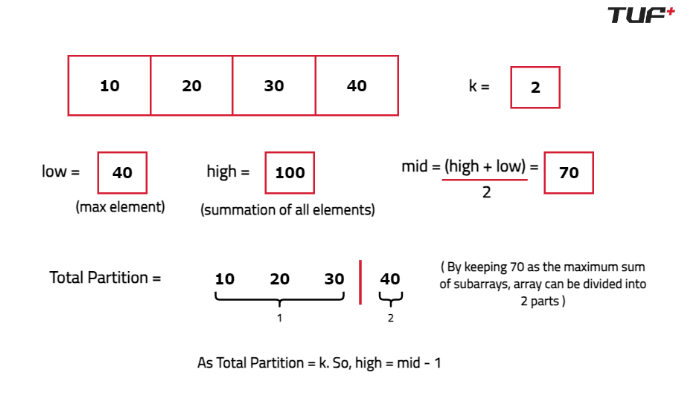
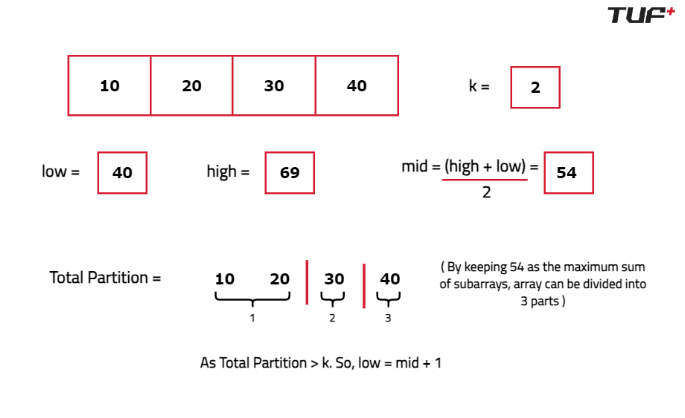
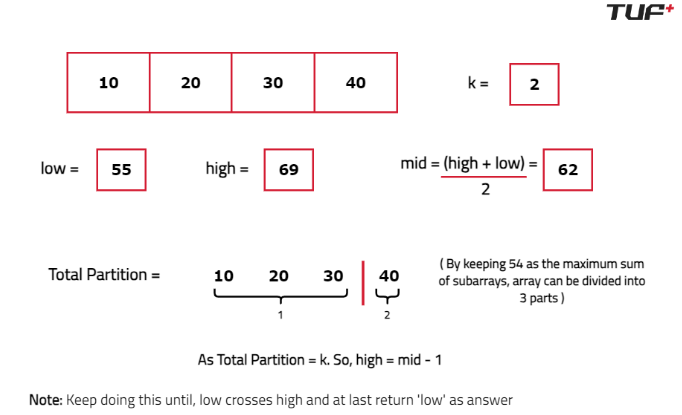

## Binary Search Python Solution

In [63]:
class Solution:
    """ Function to count partitions such 
    that each partition has sum <= maxSum"""
    def countPartitions(self, a, maxSum):
        n = len(a)
        partitions = 1
        subarraySum = 0

        for i in range(n):
            if subarraySum + a[i] <= maxSum:
                # Add element to the current subarray
                subarraySum += a[i]
            else:
                # Start a new subarray with current element
                partitions += 1
                subarraySum = a[i]

        return partitions

    """ Function to find the largest minimum 
    subarray sum with at most k partitions"""
    def largestSubarraySumMinimized(self, a, k):
        # Initialize binary search boundaries
        low = max(a)  
        high = sum(a) 

        # Apply binary search
        while low <= high:
            mid = (low + high) // 2
            partitions = self.countPartitions(a, mid)

            if partitions > k:
                """ If partitions exceed k, increase 
                the minimum possible subarray sum"""
                low = mid + 1
            else:
                """ If partitions are within k, try to 
                minimize the subarray sum further"""
                high = mid - 1

        """ After binary search, 'low' will be
        the largest minimum subarray sum with
        at most k partitions"""
        return low

In [64]:
if __name__ == "__main__":
    a = [10, 20, 30, 40]
    k = 2
    
    # Create an instance of the Solution class
    sol = Solution()
    
    # Print the answer
    print("The answer is:", sol.largestSubarraySumMinimized(a, k))

The answer is: 60


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N * log(sum-max)), where N is size of the array, sum is the sum of all array elements, max is the maximum of all array elements.

This is because Binary Search is applied within the range [max, sum], and the countPartitions() function is invoked for each value of 'mid'. Inside the countPartitions() function, a loop iterates N times for each call.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**Why use Binary Search to minimize the largest sum?**
```
Testing all possible splits is computationally expensive (O(2^n)). Binary search narrows the range of possible sums, reducing the complexity to O(n * log(sum(a)−max(a))).
```

**How is the feasibility of mid checked?**
```
Traverse the array and form subarrays: Add elements to the current subarray until adding another element would exceed mid. Start a new subarray and increment the subarray count. If the subarray count exceeds k, mid is not feasible.
```

**Can this approach handle dynamic updates to the array?**
```
For dynamic scenarios, maintain a prefix sum array to quickly recompute sums. Apply the binary search logic on the updated prefix sum.
```

**How would you handle additional constraints, like maximum subarray length?**
```
Modify the feasibility check to account for the maximum allowed subarray length. Ensure that the number of elements in each subarray does not exceed the constraint during the traversal.
```

# 11. Painter's Partition :

## Problem Statement :

You are given A painters and an array C of N integers where C[i] denotes the length of the ith board. Each painter takes B units of time to paint 1 unit of board. You must assign boards to painters such that:

Each painter paints only contiguous segments of boards.
No board can be split between painters.
The goal is to minimize the time to paint all boards.

<b>Return the minimum time required to paint all boards modulo 10000003.</b>


### Examples :

**Example 1:**
```
Input: A = 2, B = 5, C = [1, 10]
Output: 50

Explanation:
Painter 1 paints board 0 (length = 1), time = 5
Painter 2 paints board 1 (length = 10), time = 50
Max time = 50
Return 50 % 10000003 = 50
```

**Example 2:**
```
Input: A = 10, B = 1, C = [1, 8, 11, 3]
Output: 11

Explanation:
Assign each board to a different painter.
Max time = max(1, 8, 11, 3) = 11
Return 11 % 10000003 = 11
```

```
Constraints:
1 <= A <= 1000
1 <= B <= 10^6
1 <= N <= 10^5
1 <= C[i] <= 10^6
```

# Binary Search

### Intuition

Think of the problem as searching for the smallest possible ceiling on how many board-units one painter can be asked to cover. If you pick a candidate ceiling X (meaning no painter paints more than X units of board length), you can greedily walk the boards left-to-right, assigning contiguous segments to each painter until that painter would exceed X, and then move to the next painter. If you can assign all boards using at most A painters under that ceiling, X is feasible; otherwise it is too small. Because feasibility is monotonic (if X is feasible then any larger X is also feasible), you can binary-search X between the length of the longest single board (a lower bound) and the sum of all board lengths (an upper bound) to find the minimal feasible X efficiently. Once you have the minimal X, multiply by B to convert board-length-units into time, and return (X * B) % 10000003.

### Approach

* Define search range:

```
low = max(C) → at least one painter must handle the longest board.
high = sum(C) → if one painter does all the boards.
```

* Use Binary Search to find minimum feasible maximum length X:

```
For a mid value, simulate the painting process.
If the boards can be painted using ≤ A painters, reduce high.
Otherwise, increase low.
```

* At the end, low (or high) gives the smallest maximum board length that works.
* Multiply by B and take modulo 10000003.

## Dry Run

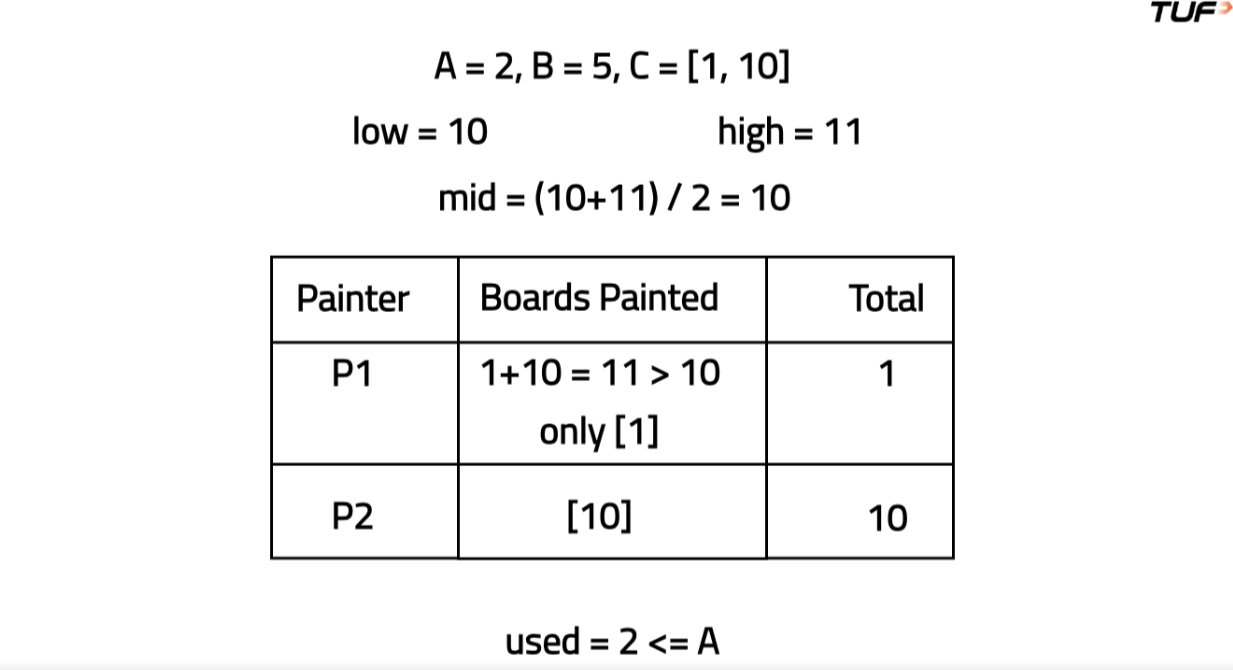
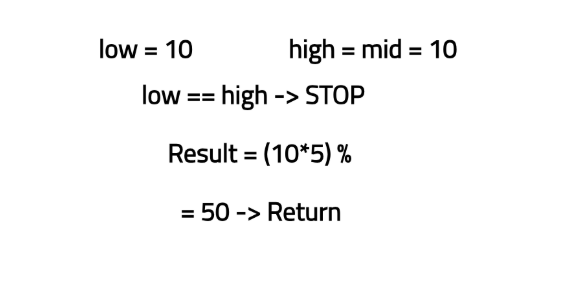

## Binary Search Python Solution

In [83]:
class Solution:
    # Return the number of painters needed if each painter can paint up to maxLen.
    # If any board > maxLen, return A + 1 to signal infeasible (i.e., more than allowed painters).
    def canPaint(self, C, A, maxLen):
        total = 0
        painters = 1

        for length in C:
            # Single board larger than allowed maxLen => infeasible
            if length > maxLen:
                return A + 1

            # Try to add this board to current painter
            if total + length <= maxLen:
                total += length
            else:
                painters += 1
                total = length

        return painters

    # Function to find minimum time required
    def paint(self, A, B, C):
        MOD = 10000003
        low, high = max(C), sum(C)
        ans = high

        while low <= high:
            mid = (low + high) // 2
            painter_count = self.canPaint(C, A, mid)

            # <= A means feasible
            if painter_count <= A:
                ans = mid
                high = mid - 1
            else:
                low = mid + 1

        return (ans * B) % MOD

In [84]:
if __name__ == "__main__":
    A = 2
    B = 5
    C = [1,10]
    
    # Create an instance of the Solution class
    sol = Solution()
    
    # Print the answer
    print("The answer is:", sol.paint(A,B,C))

The answer is: 50


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N log(sum(C))). Each feasibility check takes O(N) Time Complexity, and binary search runs log(sum(C)) times.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# 12. Minimize Max Distance to Gas Station :

## Problem Statement :

Given a sorted array arr of size n, containing integer positions of n gas stations on the X-axis, and an integer k, place k new gas stations on the X-axis.

The new gas stations can be placed anywhere on the non-negative side of the X-axis, including non-integer positions.

<b> Let dist be the maximum distance between adjacent gas stations after adding the k new gas stations. Find the minimum value of dist. </b>

Your answer will be accepted if it is within 1e-6 of the true value.


### Examples :

**Example 1:**
```
Input: n = 10, arr = [1, 2, 3, 4, 5, 6 ,7, 8, 9, 10], k = 10
Output: 0.50000

Explanation:
One of the possible ways to place 10 gas stations is [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10].
Thus the maximum difference between adjacent gas stations is 0.5. Hence, the value of dist is 0.5.
It can be shown that there is no possible way to add 10 gas stations in such a way that the value of dist is lower than this.
```

**Example 2:**
```
Input : n = 10, arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], k = 1
Output: 1.00000

Explanation:
One of the possible ways to place 1 gas station is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11].
New Gas Station is at 11. Thus the maximum difference between adjacent gas stations is still 1. Hence, the value of dist is 1.
It can be shown that there is no possible way to add 1 gas station in such a way that the value of dist is lower than this. 
```

```
Constraints:
10 <= n <= 5000 
0 <= arr[i] <= 10^9
arr is sorted in a strictly increasing order 
0 <= k <= 10^5
```

# Brute Force Solution

### Intuition

* The idea here is to use very straightforward approach to solve this problem by using extra space. Declare an array of size n-1, where n is the size of the array given. Each of its indexes will represent the respective sections between the given gas stations. In each iteration, identify the index, such that subtraction of element at that index from element at the very next index is the maximum. Then, insert new stations into that section to reduce that maximum distance. The number of stations inserted in each section will be tracked using the previously declared array of size n-1.
* Finally, after placing all the stations find the maximum distance between two consecutive stations. Among all the values of distances, the maximum one will be our answer.

### Approach

* First, declare an array ‘howMany’ of size n-1, to keep track of the number of placed gas stations, where n is the size of the array provided.
* Next, traverse the gas stations from 1 to k using a loop and pick gas stations one at a time.
* Then, using a nested loop, identify a index, such that subtraction of element at that index from element at the very next index is the maximum and insert the current gas station between arr[index] and arr[index+1] (i.e. howMany[i]++).
* Finally, after placing all the new stations, find the distance between two consecutive gas stations. For a particular section, distance = section_length / (number_of_stations_inserted+1) = (arr[i+1]-arr[i]) / (howMany[i]+1)
* Among all the distances, the maximum one will be the answer.

## Brute Force Python Solution

In [85]:
class Solution:
    """ Function to minimize the maximum
    distance between gas stations """
    def minimiseMaxDistance(self, arr, k):
        n = len(arr)  
        howMany = [0] * (n - 1)

        # Pick and place k gas stations
        for gasStations in range(1, k + 1):
        
            maxSection = -1
            maxInd = -1
        
            """ Find the maximum section 
            and insert the gas station"""
            for i in range(n - 1):
                diff = arr[i + 1] - arr[i]
                sectionLength = diff / (howMany[i] + 1)
            
                """ Update the maximum section
                length and its index """
                if sectionLength > maxSection:
                    maxSection = sectionLength
                    maxInd = i
                  
            """ Insert the current gas 
            station into the section"""
            howMany[maxInd] += 1

        # Find the maximum distance i.e. the answer
        maxAns = -1
    
        for i in range(n - 1):
            diff = arr[i + 1] - arr[i]
            sectionLength = diff / (howMany[i] + 1)
            maxAns = max(maxAns, sectionLength)
        
        return maxAns

In [87]:
if __name__ == "__main__":
    arr= [3, 6, 12, 19, 33, 44, 67, 72, 89, 95]
    k = 2

    # Create an instance of the Solution class
    sol = Solution()

    # Call the minimiseMaxDistance method and print the result
    ans = sol.minimiseMaxDistance(arr, k)
    print(f"The answer is: {ans:.6f}")

The answer is: 14.000000


## Dry Run

**First, compute gaps and initialize. Gaps (diffs) between consecutive stations is as follows :**
```
[3,6] → 3
[6,12] → 6
[12,19] → 7
[19,33] → 14
[33,44] → 11
[44,67] → 23   ← largest gap initially
[67,72] → 5
[72,89] → 17
[89,95] → 6


n = 10 → there are n-1 = 9 gaps
howMany = [0,0,0,0,0,0,0,0,0] initially
The current section length for gap i is diff / (howMany[i] + 1); initially it’s just the diff.

We will place 2 gas stations, one at a time.
```

**Iteration 1 (place 1st station). Compute current section lengths (since howMany are zero, section = diff):**
```
Sections: [3, 6, 7, 14, 11, 23, 5, 17, 6]
The maximum section is 23 at index i = 5 (gap [44,67]).

Place a station in gap 5:

howMany[5] += 1 → howMany becomes [0,0,0,0,0,1,0,0,0].

Now gap 5 ([44,67], diff = 23) is split into 2 sections (because howMany=1 → 1 station creates 2 sections),

New max section in that gap: 23 / (1 + 1) = 11.5.
```

**Iteration 2 (place 2nd station). Recompute current section lengths with updated howMany:**
```
For each i, section = diff / (howMany[i] + 1):

i=0: 3 / 1 = 3
i=1: 6 / 1 = 6
i=2: 7 / 1 = 7
i=3: 14 / 1 = 14
i=4: 11 / 1 = 11
i=5: 23 / 2 = 11.5
i=6: 5 / 1 = 5
i=7: 17 / 1 = 17
i=8: 6 / 1 = 6

The maximum section now is 17 at index i = 7 (gap [72,89]).

Place a station in gap 7:

howMany[7] += 1 → howMany becomes [0,0,0,0,0,1,0,1,0].
Gap 7 ([72,89], diff = 17) becomes 2 sections of 17 / 2 = 8.5.
```

**After placing all k = 2 stations, compute the final maximum section across all gaps:**
```
i=0: 3 / 1 = 3
i=1: 6 / 1 = 6
i=2: 7 / 1 = 7
i=3: 14 / 1 = 14
i=4: 11 / 1 = 11
i=5: 23 / 2 = 11.5
i=6: 5 / 1 = 5
i=7: 17 / 2 = 8.5
i=8: 6 / 1 = 6

Max section = 14 (from the 19–33 gap), so the minimized maximum distance is 14.0.
```

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(k*N) + O(N), where N is the size of the given array, and k is the number of gas stations to be placed. O(k*N) is to insert k gas stations between the existing stations with maximum distance. Another O(N) is for finding the answer i.e. the maximum distance.
```

**Space Complexity:**
```
The Space Complexity will be O(N-1) as an array is used to keep track of placed gas stations.
```

# Better Solution

### Intuition

* The idea here is to use the Heap data structure, which can be implemented as a Priority Queue, to solve the problem more efficiently. Instead of the brute-force approach where we iterate over each gas station to find the maximum distance to the next one, we can optimize this using a heap.
* <b>In a max heap implementation, the largest element is always at the root. This property allows us to efficiently retrieve the maximum distance.</b> Store the elements in the heap as pairs, where each pair consists of the distance and its corresponding index. This way, we can keep track of the distances and their respective positions as we process each gas station.
* By using a max heap (implemented via a priority queue), we avoid the need to iterate through the array multiple times to find the maximum distance manually. Instead, the heap structure inherently keeps track of the maximum distance, allowing us to place each gas station optimally.

### Approach

* First, declare an array howMany of size n-1, to keep track of the number of placed gas stations and a priority queue that uses max heap, where n is the size of array provided in question.
* Now, insert the first n-1 indices with the respective distance value, for every index.
* Next, using a loop we will pick k gas stations one at a time. Then pick the first element of the priority queue as this is the element with the maximum distance. Let’s call the index ‘secInd’.
* Now place the current gas station at ‘secInd’(howMany[secInd]++) and calculate the new section length. After that, again insert the pair (new section length, secInd) into the priority queue for further consideration.
* After performing all the steps for k gas stations, the distance at the top of the priority queue will be the answer as we want the maximum distance.

## Better Python Solution

In [88]:
import heapq

class Solution:
    """ Function to minimize the maximum
        distance between gas stations """
    def minimiseMaxDistance(self, arr, k):
        
        n = len(arr) 
        
        """ Array to store how many gas 
            stations are placed in each section """
        howMany = [0] * (n - 1)
        
        """ Min heap to store sections by
            their current maximum distance """
        pq = []

        """ Insert first n-1 elements into priority
            queue with respective distance values """
        for i in range(n - 1):
            heapq.heappush(pq, (-float(arr[i + 1] - arr[i]), i))

        for gasStations in range(1, k + 1):
            """ Find the maximum section 
                and insert the gas station """
            neg_dist, secInd = heapq.heappop(pq) 
            
             # Get the section with maximum distance
            max_dist = -neg_dist 
            
            # Insert current gas station into section
            howMany[secInd] += 1

            """ Calculate the initial difference
                between adjacent gas stations """
            inidiff = float(arr[secInd + 1] - arr[secInd])

            """ Calculate the new section length 
                after inserting another gas station """
            newSecLen = inidiff / (howMany[secInd] + 1)

            """ Push the updated section 
                back into the priority queue """
            heapq.heappush(pq, (-newSecLen, secInd))

        """ Return the maximum distance in
        the top section of the heap"""
        return -pq[0][0]

In [89]:
if __name__ == "__main__":
    arr = [3, 6, 12, 19, 33, 44, 67, 72, 89, 95]
    k = 2

    # Create an instance of the Solution class
    sol = Solution()

    # Call the minimiseMaxDistance method and print the result
    ans = sol.minimiseMaxDistance(arr, k)
    print(f"The answer is: {ans}")

The answer is: 14.0


## Dry Run

**Initial setup:**
```
Number of gaps: n-1 = 9
howMany = [0,0,0,0,0,0,0,0,0]

Initial gaps (diffs):

i=0: 6-3   = 3
i=1: 12-6  = 6
i=2: 19-12 = 7
i=3: 33-19 = 14
i=4: 44-33 = 11
i=5: 67-44 = 23   ← largest
i=6: 72-67 = 5
i=7: 89-72 = 17
i=8: 95-89 = 6

Push initial sections to heap as (-diff, i):
pq contains: (-23, 5), (-17, 7), (-14, 3), (-11, 4), (-7, 2), (-6, 1), (-6, 8), (-5, 6), (-3, 0)

Note that the order in a heap is not strictly sorted; We are just listing out the conceptual contents.
```

**Iteration 1 (Place 1st Station)**
```
Pop the max section:
heapq.heappop(pq) → (-23, 5) → max_dist = 23, secInd = 5 (gap [44,67])


Place station in gap 5:
howMany[5] += 1 → howMany = [0,0,0,0,0,1,0,0,0]


Recompute the new section length for gap 5:

inidiff = arr[6] - arr[5] = 67 - 44 = 23
newSecLen = inidiff / (howMany[5] + 1) = 23 / (1+1) = 11.5

Push updated section back into the heap:
heapq.heappush(pq, (-11.5, 5))

Heap now conceptually has:
(-17, 7), (-14, 3), (-11.5, 5), (-11, 4), (-7, 2), (-6, 1), (-6, 8), (-5, 6), (-3, 0)

Current howMany: [0,0,0,0,0,1,0,0,0]
```

**Iteration 2 (Place 2nd Station)**
```
Pop the max section:
heapq.heappop(pq) → (-17, 7) → max_dist = 17, secInd = 7 (gap [72,89])


Place station in gap 7:
howMany[7] += 1 → howMany = [0,0,0,0,0,1,0,1,0]


Recompute new section length for gap 7:

inidiff = arr[8] - arr[7] = 89 - 72 = 17
newSecLen = 17 / (1+1) = 8.5

Push updated section back into the heap:
heapq.heappush(pq, (-8.5, 7))

Heap now conceptually has:
(-14, 3), (-11.5, 5), (-11, 4), (-8.5, 7), (-7, 2), (-6, 1), (-6, 8), (-5, 6), (-3, 0)

We’ve placed all k = 2 stations.

The function returns -pq[0][0], i.e., the current maximum section length from the heap top.
At this point, the heap’s top is (-14, 3), and hence the returned value is 14.0.
```

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(NlogN + klogN), where N is size of the given array, and k = no. of gas stations to be placed. This is because the insert operation of priority queue takes logN time complexity. O(NlogN) is for inserting all the indices with distance values and O(klogN) is for placing the gas stations.
```

**Space Complexity:**
```
The Space Complexity will be O(N-1) + O(N-1). The first O(N-1) is for the array to keep track of placed gas stations and the second one is for the priority queue.
```

# Optimal Solution

### Intuition

The idea here is to use the Binary Search algorithm to optimize the approach. The primary objective of the Binary Search algorithm is to efficiently determine the appropriate half to eliminate, thereby reducing the search space by half. It does this by determining a specific condition that ensures that the target is not present in that half.

### Observations

* Minimum possible answer: The minimum possible answer is obtained when all the gas stations are placed in a single location. In this case, the maximum distance will be 0.
* Maximum possible answer: Stations will not be placed before the first or after the last station; instead, they will be placed in between the existing stations. Therefore, the maximum possible answer is determined by the maximum distance between two consecutive existing stations.
* Upon closer observation, it can be recognized that the answer space ranges between [0, max(dist)] and it is sorted. Additionally, a pattern can be identified that allows the space to be divided into two halves: one consisting of potential answers and the other of non-viable options. Therefore, binary search will be applied on the answer space.

### Changes in the Binary Search algorithm to apply it to the decimal answer space:

* The traditional Binary Search algorithm used for integer answer space won't be effective in this case, as the answer space consists of decimal numbers. Changes need to be made to adjust some conditions to tailor the algorithm to this specific context. These changes are as follows:
* The condition 'while(low <= high)' inside the 'while' loop won't work for decimal answers and might lead to a TLE (Time Limit Exceeded) error. To avoid this, the condition can be modified to 'while(high - low > 10^(-6))'. This ensures that only differences up to the 6th decimal place are considered. Any differences beyond this decimal precision won't be taken into account, as answers within 10^-6 of the actual answer are explicitly accepted by the question.
* The operation 'low = mid + 1' is used to eliminate the left half. However, to ensure that we do not skip over potential decimal numbers and possibly miss the actual answer, 'low = mid' will be used instead.
* Similarly, the operation 'high = mid - 1' is used to eliminate the right half. However, to ensure that potential decimal numbers are not overlooked and that the actual answer is not missed, 'high = mid' will be used instead.

## Approach

Binary search is being applied on the answer, specifically on the possible values of distances. Therefore, a method needs to be devised to determine the number of gas stations that can be placed for a particular value of distance.

### Working of minimiseMaxDistance(arr, k):

* The maximum distance between two consecutive gas stations, denoted as max(dist), is first determined.
* Pointers, denoted as low and high, are initially positioned. Low points to 0, and high points to max(dist).
* Employ the while with the condition ‘while(high - low > 10^(-6))’. Within the loop, the value of ‘mid’ is calculated using the formula mid = (low + high) / 2.0.
* Invoke the ‘numberOfGasStationsRequired()’ function with ‘mid’ as the potential distance value to determine the number of gas stations that can be placed.
* If the result returned by the function is greater than k, the left half is eliminated (low = mid). Otherwise, the right half is eliminated (high = mid).
* Finally, outside the loop, return either low or high as their difference is less than or equal to 10^(-6), both potentially representing the answer. Here, 'high' is returned as the chosen possible answer.

### Working of numberOfGasStationsRequired(dist, arr):

* First, initialize few variables: 'n' stores the size of the vector arr and 'cnt' is initialized to count the number of gas stations required.
* Iterate through the array and for each pair of consecutive elements, calculate the 'numberInBetween', which represents the number of gas stations needed between these two points. This gives an estimate of how many stations would be needed if they were evenly spaced along the distance 'dist'.
* If the actual distance calculated perfectly matches (dist * numberInBetween), adjust 'numberInBetween' by subtracting 1. This adjustment is intended to handle cases where the distance exactly matches the spacing defined by 'dist'. Otherwise increase the 'cnt' by 'numberInBetween'. Finally return 'cnt' variable.

## Binary Search Python Solution

In [93]:
import math

class Solution:
    # Function to calculate the number of gas 
    # stations required for given distance
    def numberOfGasStationsRequired(self, dist, arr):
        n = len(arr)
        cnt = 0
        for i in range(1, n):
            # Calculate number of gas stations 
            # needed between two points
            gap = arr[i] - arr[i - 1]

            if gap > dist:
                cnt += math.ceil(gap/dist)-1
                
        return cnt

    # Function to minimize the maximum 
    # distance between gas stations
    def minimiseMaxDistance(self, arr, k):
        n = len(arr)
        low = 0
        high = 0

        # Find the maximum distance between 
        # consecutive gas stations
        for i in range(n - 1):
            high = max(high, arr[i + 1] - arr[i])

        # Apply Binary search to find the 
        # minimum possible maximum distance
        diff = 1e-6
        while high - low > diff:
            mid = (low + high) / 2.0
            cnt = self.numberOfGasStationsRequired(mid, arr)

            # Adjust the search range based on the 
            # number of gas stations required
            if cnt > k:
                low = mid
            else:
                high = mid

        # Return the smallest maximum distance found
        return high

In [94]:
if __name__ == "__main__":
    arr = [3, 6, 12, 19, 33, 44, 67, 72, 89, 95]
    k = 2

    # Create an instance of the Solution class
    sol = Solution()

    # Call the minimiseMaxDistance method and print the result
    ans = sol.minimiseMaxDistance(arr, k)
    print(f"The answer is: {ans}")

The answer is: 14.000000089406967


## Dry Run

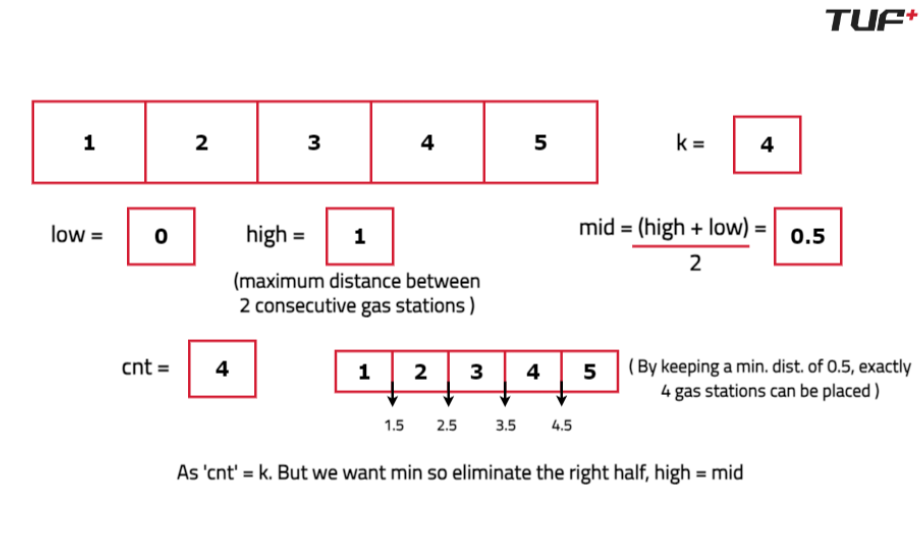
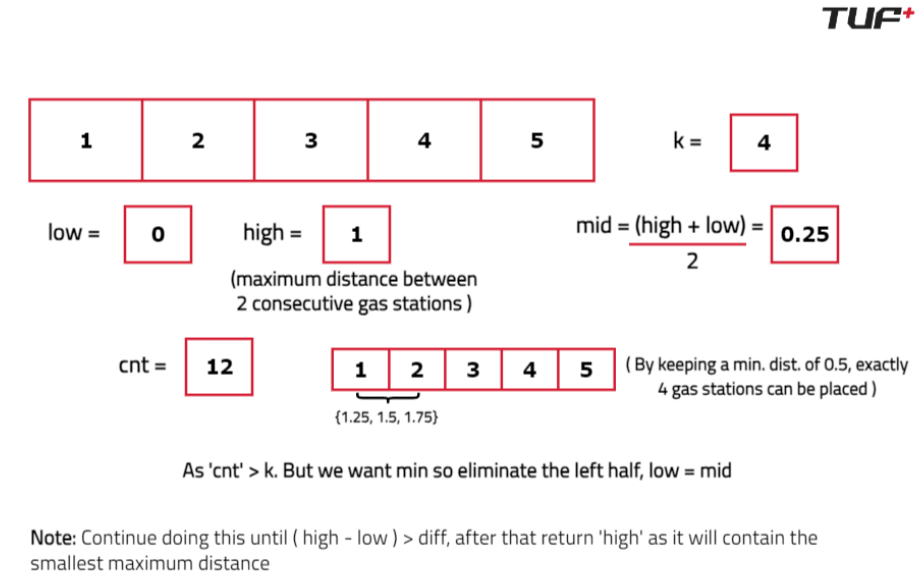

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N*log(Len)) + O(N), where N is the size of the given array, Len is length of the answer space. Binary search is being applied on the answer space. For every possible answer, the function numberOfGasStationsRequired() is called, which has a time complexity of O(N). Additionally, O(N) time complexity is incurred initially for finding the maximum distance.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**How does floating-point precision affect the solution?**
```
Since gas stations can be placed at non-integer positions, floating-point arithmetic is used. The Binary Search stops when the range of possible dist values is smaller than a specified precision (ϵ).
```

**What if the array has fewer than two gas stations?**
```
If there is only one gas station (n=1), the gap is undefined. Any additional gas stations can be placed arbitrarily, making dist depend only on their positions.
```

**What if gas stations cannot be placed at arbitrary positions?**
```
If new stations must be placed at predefined positions (e.g., integer locations), modify the feasibility check to only consider those positions and adjust the binary search accordingly.
```

**How would you handle dynamic updates (e.g., removing stations)?**
```
For dynamic updates, maintain a sorted list of gas station positions. Use efficient data structures like balanced binary search trees to dynamically insert or remove stations and recompute dist.
```

# 13. Median of 2 Sorted Arrays :

## Problem Statement :

Given 2 sorted arrays arr1 and arr2 of size m and n respectively, return the median of the two sorted arrays.

<b> The median is defined as the middle value of a sorted list of numbers. In case the length of the list is even, the median is the average of the two middle elements. </b>


### Examples :

**Example 1:**
```
Input: arr1 = [2, 4, 6], arr2 = [1, 3, 5]
Output: 3.5

Explanation: The array after merging arr1 and arr2 will be [ 1, 2, 3, 4, 5, 6 ]. As the length of the merged list is even, the median is the average of the two middle elements. Here the 2 middle elements are 3 and 4. So the median will be the average of 3 and 4, which is 3.5.
```

**Example 2:**
```
Input: arr1 = [2, 4, 6], arr2 = [1, 3]
Output: 3.0

Explanation: The array after merging arr1 and arr2 will be [1, 2, 3, 4, 6]. The median is simply 3 ie. the middle element in the sorted array.
```

```
Constraints:
0 <= m <= 1000
0 <= n <= 1000
1 <= m + n <= 2000
-10^6 <= arr1[i], arr2[i] <= 10^6
```

# Brute Force Solution

### Intuition

The extremely naive approach is to merge the 2 sorted arrays and then find the median of the final merged array. <b>Given that the arrays are already sorted, the merge approach of the merge sort algorithm can be used. This approach iterates through both arrays, picking the smallest elements first and then the larger ones, resulting in a final sorted array.</b>

### Approach

* If the length of the merged array is even: The median is the average of the two middle elements. The index = (sizeOfMergedArray) / 2, median will be the sum of element at 'index' and the element at 'index-1' divided by 2.
* If the length of the merged array is odd: index = (sizeOfMergedArray) / 2, median will be the element at 'index'.
* Initialize an array of size equal to sum of size of 1st array and size of 2nd array to store the elements of the merged array.
* Now, take two pointers i and j, where i points to the first element of arr1 and j points to the first element of arr2.
* Next, initialize a while loop, which will run till any one of the pointers crosses the size of their respective array. If the element at pointer i is less than or equal to element at pointer j, then insert the element at pointer i in the merged array and increase i by 1. Otherwise, insert the element at j into the merged array and increase j by 1.
* After that, the left-out elements from both arrays will be copied as it is into the merged array. Now, the merged array will be sorted, and then find the median based on the size of the array if it is even or odd. Finally, return the value of the median.

## Brute Force Python Solution

In [95]:
class Solution:
    #Function to find the median of two sorted arrays.
    def median(self, arr1, arr2):
        # Size of two given arrays
        n1, n2 = len(arr1), len(arr2)

        merged = []
        # Apply the merge step
        i, j = 0, 0
        while i < n1 and j < n2:
            if arr1[i] < arr2[j]:
                merged.append(arr1[i])
                i += 1
            else:
                merged.append(arr2[j])
                j += 1

        # Copy the remaining elements
        while i < n1:
            merged.append(arr1[i])
            i += 1
        while j < n2:
            merged.append(arr2[j])
            j += 1

        # Find the median
        n = n1 + n2
        if n % 2 == 1:
            return float(merged[n // 2])

        median = (float(merged[n // 2]) + float(merged[(n // 2) - 1])) / 2.0
        return median

In [96]:
if __name__ == "__main__":
    a = [1, 4, 7, 10, 12]
    b = [2, 3, 6, 15]
    
    # Create an instance of the Solution class
    sol = Solution()
    
    # Print the median of the two sorted arrays
    print("The median of two sorted arrays is", sol.median(a, b))

The median of two sorted arrays is 6.0


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N1 + N2), where N1 and N2 are the sizes of the given arrays. This is the case because both the arrays are being traversed linearly.
```

**Space Complexity:**
```
The Space Complexity will be O(N1 + N2), as an extra array of size (N1+N2) is being used to solve this problem.
```

# Better Solution

### Intuition

The idea here is to optimize the extra space used in the Brute Force approach by eliminating the array used to store the final merged result. Upon closer observation, it can be noticed that only the two middle elements at indices [(sum of the sizes of both arrays) / 2] and [((sum of the sizes of both arrays) / 2) - 1] are needed, rather than the entire merged array, to effectively solve the problem. 

Stick to the same basic approach, but instead of storing the elements in a separate array, use a counter called cnt to represent the imaginary third array's index. While traversing through the arrays, when 'cnt' reaches either index (sum of size of both the arrays)/2 or ((sum of size of both the arrays)/2)-1, store that particular element. This way, the same goal can be achieved without using any extra space.

### Approach

* Initaialize the two indices as ind2 = (n1 + n2)/2 and ind1 = ((n1+n2)/2)-1. These indices are showing the position of medians in the merged array. Also, declare the counter called ‘cnt’ and initialize it with 0.
* Now, take 2 pointers i and j, where i points to the first element of arr1 and j points to the first element of arr2.
* Next, initialize a while loop, which will run till any one of the pointers crosses the size of their respective array. If the element at pointer i is less than or equal to element at pointer j, then check if 'cnt' is equal to any of the indices of the medians, if so, store the element at index i. Then increase i and 'cnt' by 1. Otherwise, check if 'cnt' is equal to any of the indices of the medians, and if so, store the element at index j. Then increase j and 'cnt' by 1.
* After that, traverse the left-out elements from both arrays and perform the above step.
* If the total length i.e. (sum of size of both the arrays) is even, then median is the average of the elements at ind1 and ind2. Else, median will be the element at index ind2.

## Better Python Solution

In [97]:
class Solution:
    #Function to find the median of two sorted arrays.
    def median(self, arr1, arr2):
        # Size of two given arrays
        n1, n2 = len(arr1), len(arr2)
        n = n1 + n2  # Total size

        # Required indices for median calculation
        ind2 = n // 2
        ind1 = ind2 - 1
        cnt = 0
        ind1el, ind2el = -1, -1

        # Apply the merge step
        i, j = 0, 0
        while i < n1 and j < n2:
            if arr1[i] < arr2[j]:
                if cnt == ind1:
                    ind1el = arr1[i]
                if cnt == ind2:
                    ind2el = arr1[i]
                cnt += 1
                i += 1
            else:
                if cnt == ind1:
                    ind1el = arr2[j]
                if cnt == ind2:
                    ind2el = arr2[j]
                cnt += 1
                j += 1

        # Copy the remaining elements
        while i < n1:
            if cnt == ind1:
                ind1el = arr1[i]
            if cnt == ind2:
                ind2el = arr1[i]
            cnt += 1
            i += 1
        while j < n2:
            if cnt == ind1:
                ind1el = arr2[j]
            if cnt == ind2:
                ind2el = arr2[j]
            cnt += 1
            j += 1

        # Find the median
        if n % 2 == 1:
            return float(ind2el)

        return float((ind1el + ind2el) / 2)

In [98]:
if __name__ == "__main__":
    a = [1, 4, 7, 10, 12]
    b = [2, 3, 6, 15]

    # Create an instance of the Solution class
    sol = Solution()

    # Print the median of the two sorted arrays
    print(f"The median of two sorted arrays is {sol.median(a, b)}")

The median of two sorted arrays is 6.0


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N1 + N2), where N1 and N2 are the sizes of the given arrays. This is because both are arrays are being traversed linearly.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# Optimal Solution using Binary Search

### Intuition

Here, the idea is to use the Binary Search algorithm to optimize the approach. The primary objective of Binary Search is to efficiently determine the appropriate half to eliminate, thereby reducing the search space by half. It achieves this by identifying a specific condition that ensures the target is not present in that half. Now, let’s observe how to apply binary search in this problem. First, we'll solve the problem where the sum of the sizes of both arrays is even; we'll consider the odd case later.

### Observation

* Assume, n = sum of size of both the arrays. Characteristics of each half is that it contains (n/2) elements. Each half contains x elements from the first array and [(n/2)-x] elements from the second array. The value of x might be different for the two halves.
* The unique configuration of halves: Considering different values of x, one can get different left and right halves (x = the number of elements taken from the first array for a particular half). Some different configurations for the above example are shown below: Median creates a partition on the final merged array: Upon closer observation, we can easily show that the median divides the final merged array into two halves.

### How to solve the problem using the above observations :

* For a valid merged array, the configurations of the two halves are unique. So, we can try to form the halves with different values of x, where x = the number of elements taken from arr1[] for a particular half.
* <b> There's no need to construct both halves. Once we have the correct left half, the right half is automatically determined, consisting of the remaining elements not yet considered. Therefore, our focus will solely be on creating the unique left half. </b>
* <b> How to form all configurations of the left half? </b> We know that the left half will surely contain x elements from arr1[] and (n/2)-x elements from arr2[]. Here the only variable is x. The minimum possible value of x is 0 and the maximum possible value is n1 (i.e. The length of the considered array).
* For all the values,[0, n1] of x, we will try to form the left half and then we will check if that half’s configuration is valid.

### Check if the formed left half is valid:

* <b> For a valid left half, the merged array will always be sorted. </b> So, if the merged array containing the formed left half is sorted, the formation is valid. How to check if the merged array is sorted without forming the array: In order to check we will consider 4 elements, i.e. l1, l2, r1, r2.

```
l1 = the maximum element belonging to arr1[] of the left half.
l2 = the maximum element belonging to arr2[] of the left half.
r1 = the minimum element belonging to arr1[] of the right half.
r2 = the minimum element belonging to arr2[] of the right half.
```

### How to apply Binary Search to form the Left Half? 

We will check the formation of the left half for all possible values of x. Now, we know that the minimum possible value of x is 0 and the maximum is n1 (i.e. The length of the considered array). Now the range is sorted. So, we will apply the binary search on the possible values of x i.e. [0, n1].

### How to eliminate the halves based on the values of x:

* Binary search works by eliminating the halves in each step. Upon closer observation, we can eliminate the halves based on the following conditions:
* If l1 > r2: This implies that we have considered more elements from arr1[] than necessary. So, we have to take less elements from arr1[] and more from arr2[]. In such a scenario, we should try smaller values of x. To achieve this, we will eliminate the right half (high = mid-1).
* If l2 > r1: This implies that we have considered more elements from arr2[] than necessary. So, we have to take less elements from arr2[] and more from arr1[]. In such a scenario, we should try bigger values of x. To achieve this, we will eliminate the left half (low = mid+1).

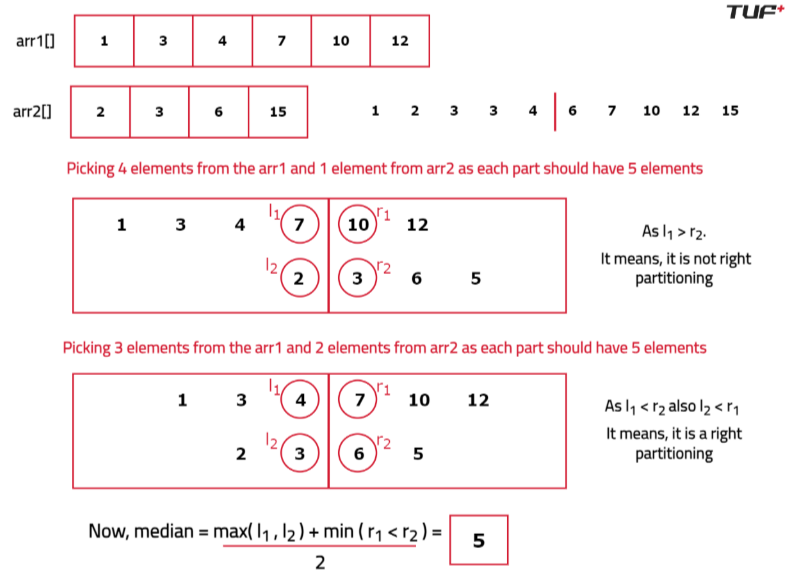

<b> Until now, we have learned how to use binary search but with the assumption that (n1 + n2) is even. Let’s generalize this. </b>

In the case of even, we have considered the length of the left half as (n1 + n2) / 2. In case (n1 + n2) is odd, the length will be (n1 + n2 + 1) / 2. This much change is enough to handle the case of odd. The rest of the things will be completely the same. As in the code, division refers to integer division, this modified formula (n1 + n2 + 1) / 2 will be valid for both cases of odd and even.

### What will be the answer i.e. the median:

* If l1 <= r2 && l2 <= r1: This condition assures that we have found the correct elements.
* If (n1 + n2) is odd: The median will be max(l1, l2). Otherwise, median = (max(l1, l2) + min(r1, r2)) / 2.0

<b> Note: We are applying Binary Search on the possible values of x i.e. [0, n1]. Here n1 is the length of arr1[]. Now, to further optimize it, we will consider the smaller array as arr1[]. So, the actual range will be [0, min(n1, n2)]. </b>

## Approach

* First, make sure that the arr1 is the smaller array. If not by default, just swap the arrays. Our main goal is to consider the smaller array as arr1[]. Calculate the length of the left half as (n1+n2+1) / 2.
* Initialize two pointers: low and high, where low will point to 0 and the high will point to n1 (i.e. The size of arr1). Calculate the ‘mid1’ i.e. x and ‘mid2’ i.e. [left - x]. Now, inside the loop, calculate the value of ‘mid1’ using the following formula, mid1 = (low + high) // 2 ( ‘//’ refers to integer division) and mid2 = left - mid1.
* Calculate l1, l2, r1, and r2: Generally :

```
l1 = arr1[mid1-1]
l2 = arr2[mid2-1]
r1 = arr1[mid1]
r2 = arr2[mid2]
```

* We binary search mid1, and compute mid2 = leftCount - mid1 so the total left side always has leftCount = (n1 + n2 + 1) // 2 elements.
* The possible values of ‘mid1’ and ‘mid2’ might be 0 and n1 and n2 respectively. So, to handle these cases, store some default values for these four variables. The default value for l1 and l2 will be INT_MIN and for r1 and r2, it will be INT_MAX.
* Eliminate the halves based on the following conditions:

```
If l1 is less than or equal to r2 and l2 is less than or equal to r1, the answer has been found.
If sum of size of the arrays is odd, return the median as maximum of (l1, l2). Otherwise, return median as the average of max(l1, l2) + min(r1, r2).
If l1 is greater than r2. This implies that more elements from arr1 have been considered than needed. So, try to take less elements from arr1 and more from arr2. In such a scenario, take smaller values of x. To achieve this, eliminate the right half (high = mid1 - 1).
If l2 is greater than r1. This implies that we have considered more elements from arr2 than needed. So, try to take less elements from arr2 and more from arr1. In such a scenario, take bigger values of x. To achieve this, eliminate the left half (low = mid1 + 1).
```

* Finally, outside the loop, include a dummy return statement just to avoid warnings or errors.

## Dry Run

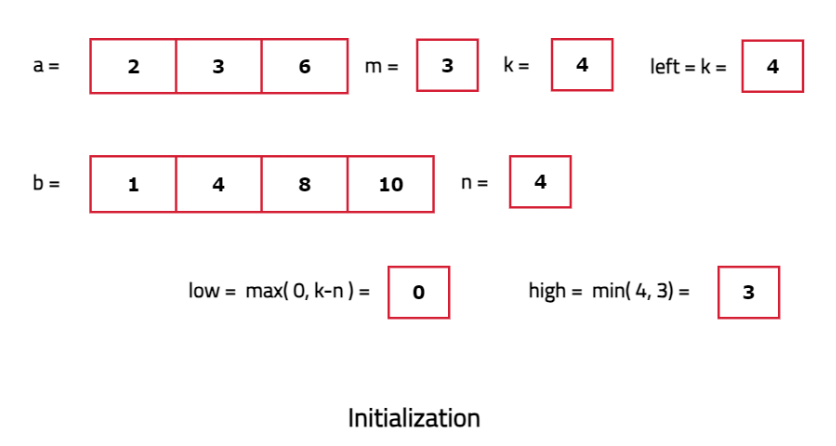
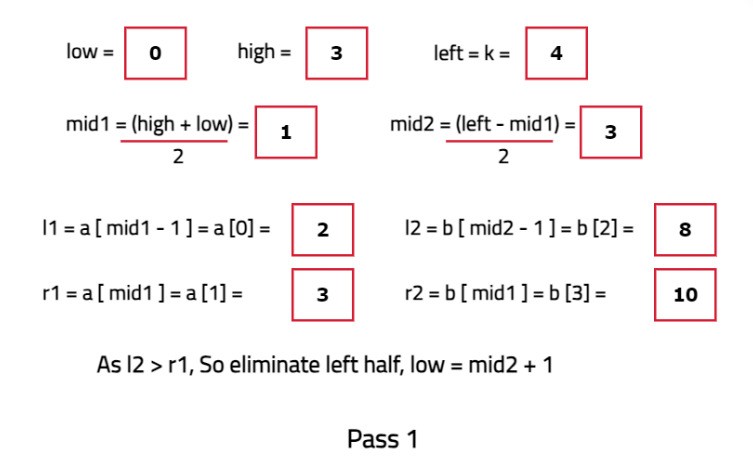
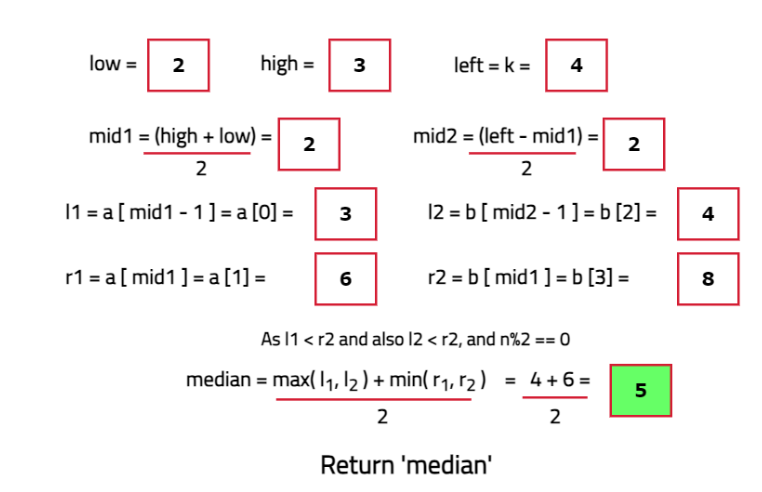

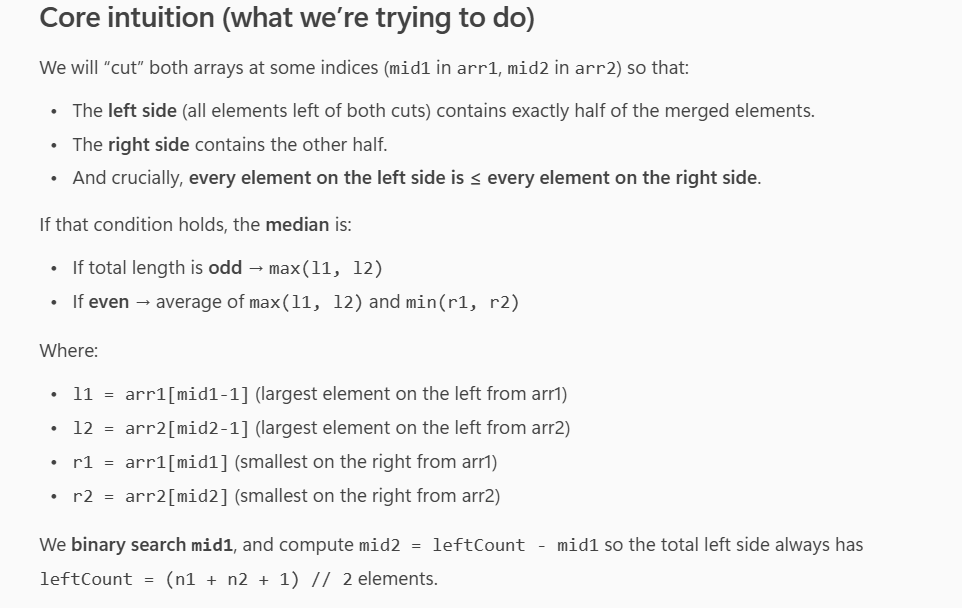

## Binary Search Python Solution

In [99]:
class Solution:
    #Function to find the median of two sorted arrays.
    def median(self, arr1, arr2):
        # Size of two given arrays
        n1, n2 = len(arr1), len(arr2)

        """ Ensure arr1 is not larger than 
        arr2 to simplify implementation"""
        if n1 > n2:
            return self.median(arr2, arr1)

        n = n1 + n2
        # Length of left half
        left = (n1 + n2 + 1) // 2 

        # Apply binary search
        low, high = 0, n1
        while low <= high:
            # Calculate mid index for arr1
            mid1 = (low + high) // 2 
            
            # Calculate mid index for arr2
            mid2 = left - mid1 

            # Calculate l1, l2, r1, and r2
            l1 = arr1[mid1 - 1] if mid1 > 0 else float('-inf') #largest on left of arr1
            r1 = arr1[mid1] if mid1 < n1 else float('inf')
            l2 = arr2[mid2 - 1] if mid2 > 0 else float('-inf')
            r2 = arr2[mid2] if mid2 < n2 else float('inf') #Smallest on right of arr2

            if l1 <= r2 and l2 <= r1:
                # If condition for finding median is satisfied
                if n % 2 == 1:
                    return max(l1, l2)
                else:
                    return (max(l1, l2) + min(r1, r2)) / 2.0
            elif l1 > r2:
                # Eliminate the right half of arr1
                high = mid1 - 1
            else:
                # Eliminate the left half of arr1
                low = mid1 + 1
        # Dummy statement
        return 0

In [100]:
if __name__ == "__main__":
    arr1 = [1, 4, 7, 10, 12]
    arr2 = [2, 3, 6, 15]

    # Create an instance of the Solution class
    sol = Solution()

    # Print the median of the two sorted arrays
    print(f"The median of two sorted arrays is {sol.median(arr1, arr2)}")

The median of two sorted arrays is 6


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(log(min(N1,N2))), where N1 and N2 are the sizes of two given arrays. This is the case because Binary Search is being applied on the range [0, min(N1, N2)]
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**What if the arrays have different sizes?**
```
Binary Search works regardless of the sizes of the arrays. The smaller array is chosen for the Binary Search to ensure efficiency, reducing the time complexity to O(log(min(m,n))).
```

**How does the algorithm ensure correctness for edge cases?**
```
Special conditions handle scenarios like: partitionX=0: All elements in the left partition come from arr2. partitionX=m: All elements in the right partition come from arr2.
```

**Can this approach be extended to more than two arrays?**
```
For k sorted arrays, use a priority queue (min-heap) to merge them while keeping track of their elements. After merging, compute the median in O(k*log(k+n)).
```

**What if the arrays contain duplicates?**
```
The algorithm handles duplicates naturally. The median is determined based on the partitioned halves, irrespective of repeated values.
```

# 14. Kth Element of 2 Sorted Arrays :